* * * * * * * * * * *
Master notebook to run every step of the analyses of the Z0 experiment in python.

Author: Rodrigo Guedes Lang (rodrigo.lang@fau.de)

Date: March 2024

Based on scripts by Kathrin Valerius and Jannik Hofestaedt from 2011-2013
* * * * * * * * * * *

In [43]:
from glob import glob
from natsort import natsorted
import uproot
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [44]:
from PIL import Image
from IPython.display import display

import ipywidgets as widgets
from ipywidgets import interact

import random

In [45]:
def browse_images(channel):
    images = natsorted(glob(f'../Data/GROPEScreenshots/{channel}/*.png'))
    def view_image(i):
        display(Image.open(images[i]))
    interact(view_image, i=(0,len(images)-1))

def pick_images():
    n = random.sample(range(0,40), k=10)
    images = natsorted(glob(f'../Data/GROPEScreenshots/test/*.png'))
    def view_image(i):
        display(Image.open(images[i]))
    interact(view_image, i=n)
    print(n)

# Part 1 - Qualitative analysis of events

In this part of the experiment, the main idea is to look at a small subset of Monte Carlo (MC) events to build up insight on how events from each channel look like on average. The final good is to come up with some crude cuts to separate the channels.

## Part 1.1 - GROPE event display

### Exercises

- 1.1. For each channel, describe qualitatively the features of its events.

- 1.2. Come up with a 4x4 table describing which variables are important for separating each pair of channels

In [46]:
browse_images("qq")

interactive(children=(IntSlider(value=9, description='i', max=18), Output()), _dom_classes=('widget-interact',…

- 1.3. Now, for 10 randomly selected images, just by looking at the GROPE image, try to evaluate what channel each event originates from (ee, mm, tt or qq).

In [47]:
pick_images()

interactive(children=(Dropdown(description='i', options=(7, 4, 30, 22, 25, 8, 17, 26, 0, 12), value=7), Output…

[7, 4, 30, 22, 25, 8, 17, 26, 0, 12]


# Part 2 - Quantitative analysis of events

Looking at singular events may help understanding how they look like in the detector. Nevertheless, due to the stochastic nature of the processes involved, each event will look quite differently and we need to look at event distributions.

In the previous part, we have dealt with very few MC events to create a better insight on what their properties and differences are. In this part, we will move on to a much larger set of MC events so that more complete and well-described distributions can be analysed. From here on, information and images of single events will not be used anymore.

## Part 2.1 - Generating histograms

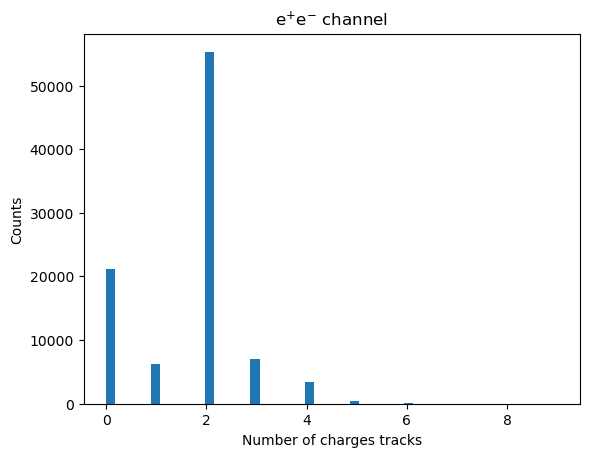

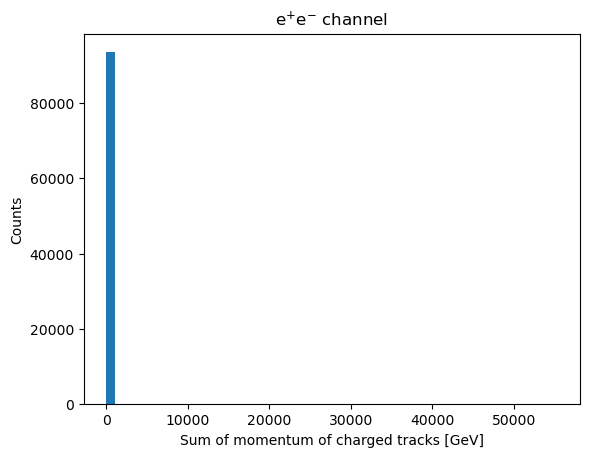

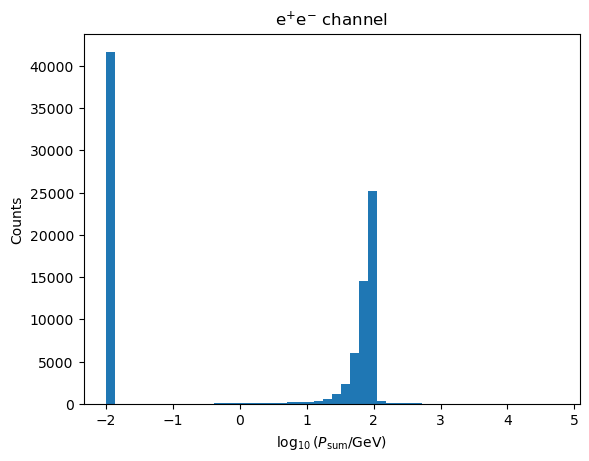

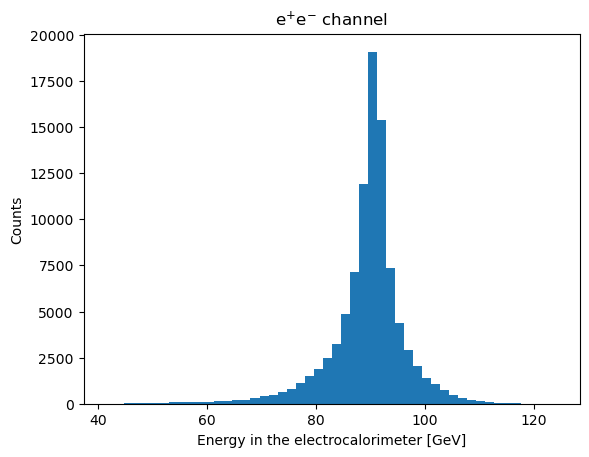

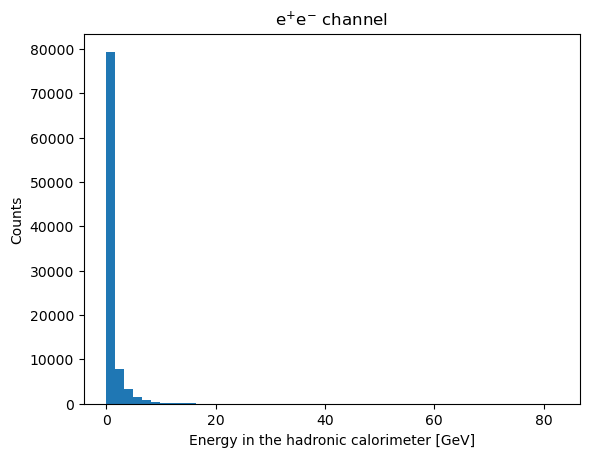

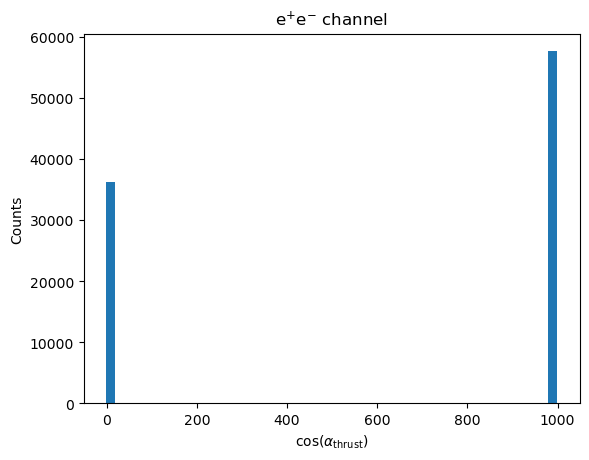

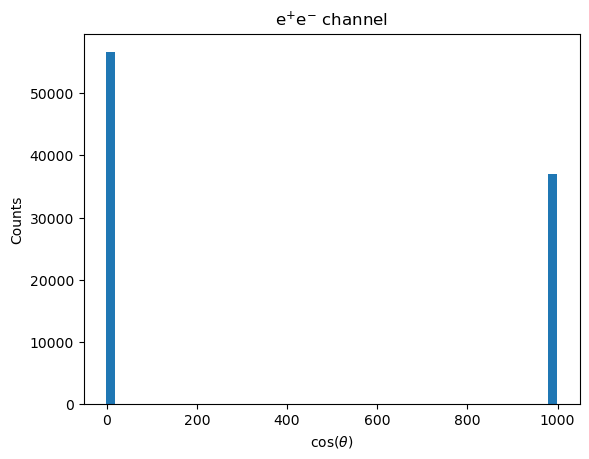

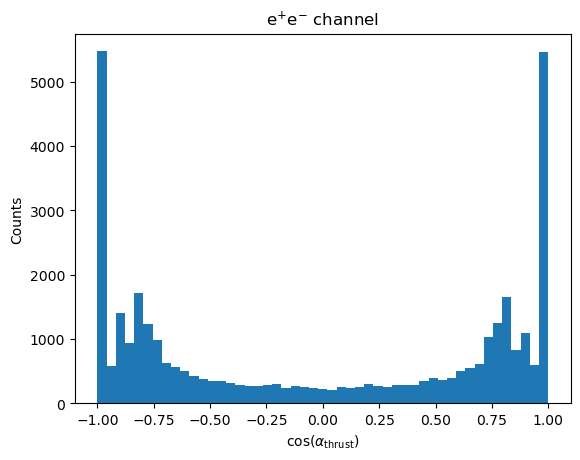

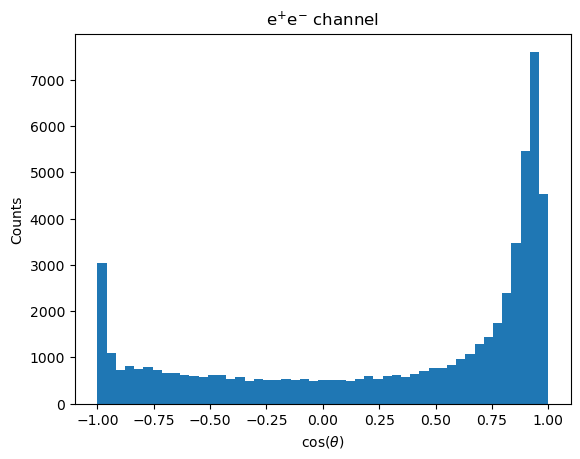

93802
36194


In [48]:
# Example for a single channel

file1 = uproot.open("../Data/MC/ee.root")
tree1 = file1['h3']

Ncharged1 = np.array(tree1['Ncharged'].array())
Pcharged1 = np.array(tree1['Pcharged'].array())
E_ecal1 = np.array(tree1['E_ecal'].array())
E_hcal1 = np.array(tree1['E_hcal'].array())
cos_thru1 = np.array(tree1['cos_thru'].array())
cos_thet1 = np.array(tree1['cos_thet'].array())


plt.hist(Ncharged1,bins=50)
plt.xlabel("Number of charges tracks")
plt.ylabel("Counts")
plt.title(r"$\rm{e^{+}e^{-}}$ channel")
plt.show()
# plt.savefig("../Figures/example.pdf") ## Use plt.savefig(<str filename>) to save the figures

plt.hist(Pcharged1,bins=50)
plt.xlabel("Sum of momentum of charged tracks [GeV]")
plt.ylabel("Counts")
plt.title(r"$\rm{e^{+}e^{-}}$ channel")
plt.show()

plt.hist(np.log10(Pcharged1+0.01),bins=50)
plt.xlabel(r"$\log_{10} (P_{\rm{sum}} / \rm{GeV})$")
plt.ylabel("Counts")
plt.title(r"$\rm{e^{+}e^{-}}$ channel")
plt.show()

plt.hist(E_ecal1,bins=50)
plt.xlabel("Energy in the electrocalorimeter [GeV]")
plt.ylabel("Counts")
plt.title(r"$\rm{e^{+}e^{-}}$ channel")
plt.show()

plt.hist(E_hcal1,bins=50)
plt.xlabel("Energy in the hadronic calorimeter [GeV]")
plt.ylabel("Counts")
plt.title(r"$\rm{e^{+}e^{-}}$ channel")
plt.show()

plt.hist(cos_thru1,bins=50)
plt.xlabel(r"$\cos(\alpha_{\rm{thrust}})$")
plt.ylabel("Counts")
plt.title(r"$\rm{e^{+}e^{-}}$ channel")
plt.show()

plt.hist(cos_thet1,bins=50)
plt.xlabel(r"$\cos(\theta)$")
plt.ylabel("Counts")
plt.title(r"$\rm{e^{+}e^{-}}$ channel")
plt.show()

plt.hist(cos_thru1,bins=np.linspace(-1,1,50))
plt.xlabel(r"$\cos(\alpha_{\rm{thrust}})$")
plt.ylabel("Counts")
plt.title(r"$\rm{e^{+}e^{-}}$ channel")
plt.show()

plt.hist(cos_thet1,bins=np.linspace(-1,1,50))
plt.xlabel(r"$\cos(\theta)$")
plt.ylabel("Counts")
plt.title(r"$\rm{e^{+}e^{-}}$ channel")
plt.show()

print(np.size(cos_thru1))
cos_thru_cut1 = cos_thru1[cos_thru1<100]
print(np.size(cos_thru_cut1))

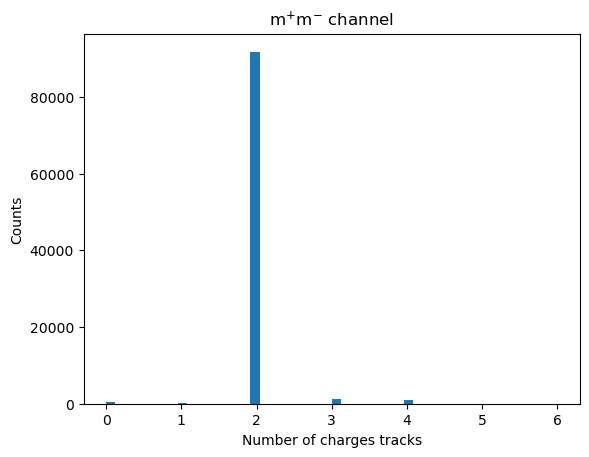

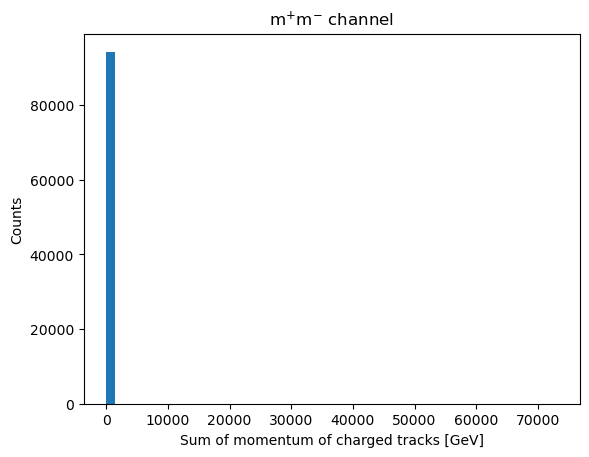

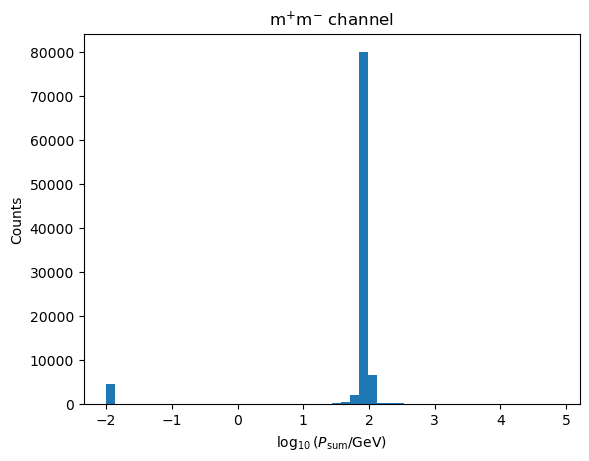

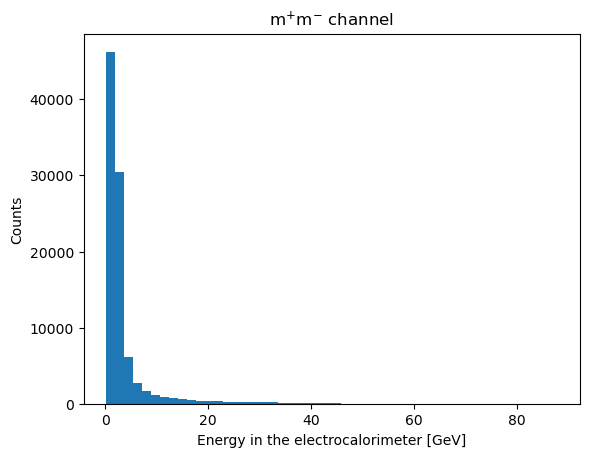

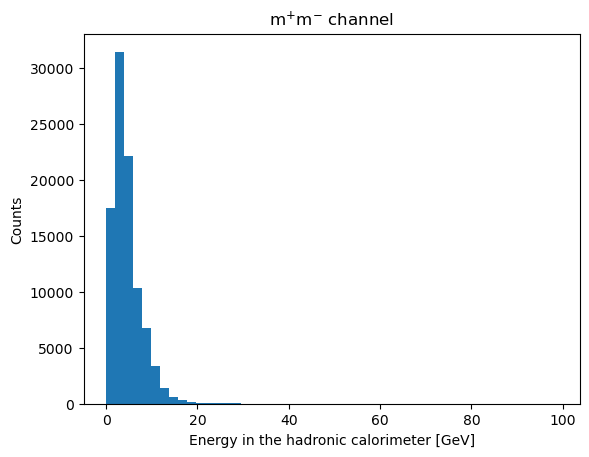

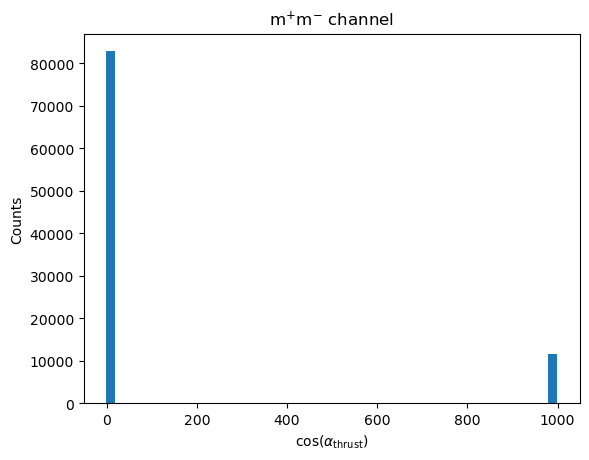

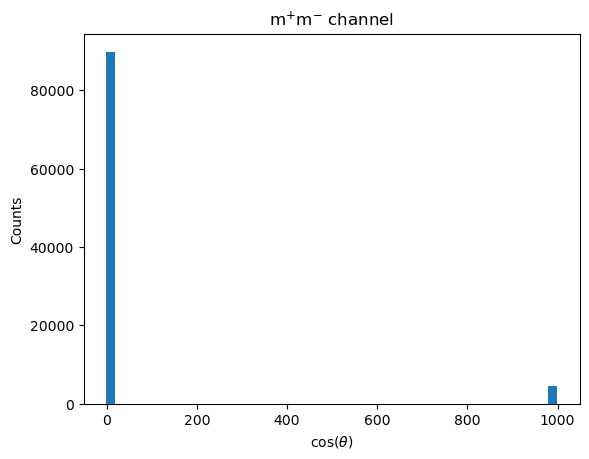

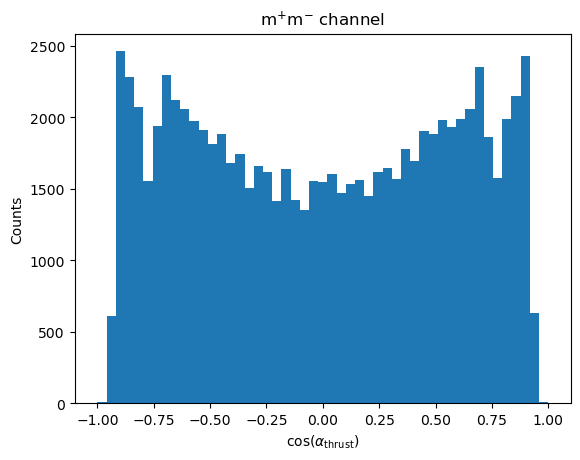

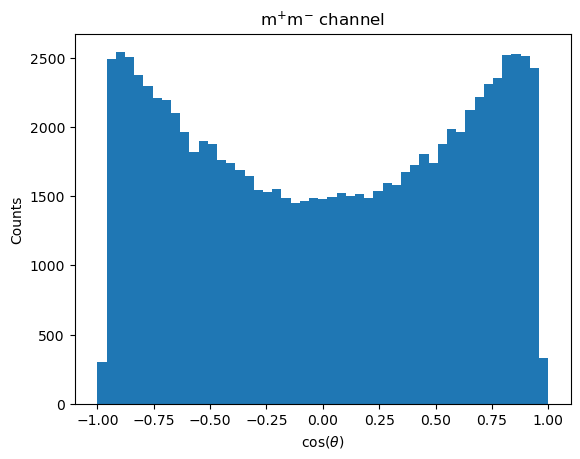

In [49]:
# Example for a single channel

file2 = uproot.open("../Data/MC/mm.root")
tree2 = file2['h3']

Ncharged2 = np.array(tree2['Ncharged'].array())
Pcharged2 = np.array(tree2['Pcharged'].array())
E_ecal2 = np.array(tree2['E_ecal'].array())
E_hcal2 = np.array(tree2['E_hcal'].array())
cos_thru2 = np.array(tree2['cos_thru'].array())
cos_thet2 = np.array(tree2['cos_thet'].array())


plt.hist(Ncharged2,bins=50)
plt.xlabel("Number of charges tracks")
plt.ylabel("Counts")
plt.title(r"$\rm{m^{+}m^{-}}$ channel")
plt.show()
# plt.savefig("../Figures/example.pdf") ## Use plt.savefig(<str filename>) to save the figures

plt.hist(Pcharged2,bins=50)
plt.xlabel("Sum of momentum of charged tracks [GeV]")
plt.ylabel("Counts")
plt.title(r"$\rm{m^{+}m^{-}}$ channel")
plt.show()

plt.hist(np.log10(Pcharged2+0.01),bins=50)
plt.xlabel(r"$\log_{10} (P_{\rm{sum}} / \rm{GeV})$")
plt.ylabel("Counts")
plt.title(r"$\rm{m^{+}m^{-}}$ channel")
plt.show()

plt.hist(E_ecal2,bins=50)
plt.xlabel("Energy in the electrocalorimeter [GeV]")
plt.ylabel("Counts")
plt.title(r"$\rm{m^{+}m^{-}}$ channel")
plt.show()

plt.hist(E_hcal2,bins=50)
plt.xlabel("Energy in the hadronic calorimeter [GeV]")
plt.ylabel("Counts")
plt.title(r"$\rm{m^{+}m^{-}}$ channel")
plt.show()

plt.hist(cos_thru2,bins=50)
plt.xlabel(r"$\cos(\alpha_{\rm{thrust}})$")
plt.ylabel("Counts")
plt.title(r"$\rm{m^{+}m^{-}}$ channel")
plt.show()

plt.hist(cos_thet2,bins=50)
plt.xlabel(r"$\cos(\theta)$")
plt.ylabel("Counts")
plt.title(r"$\rm{m^{+}m^{-}}$ channel")
plt.show()

plt.hist(cos_thru2,bins=np.linspace(-1,1,50))
plt.xlabel(r"$\cos(\alpha_{\rm{thrust}})$")
plt.ylabel("Counts")
plt.title(r"$\rm{m^{+}m^{-}}$ channel")
plt.show()

plt.hist(cos_thet2,bins=np.linspace(-1,1,50))
plt.xlabel(r"$\cos(\theta)$")
plt.ylabel("Counts")
plt.title(r"$\rm{m^{+}m^{-}}$ channel")
plt.show()

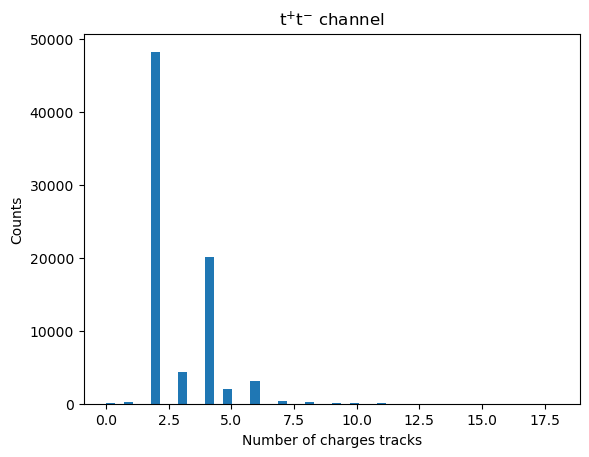

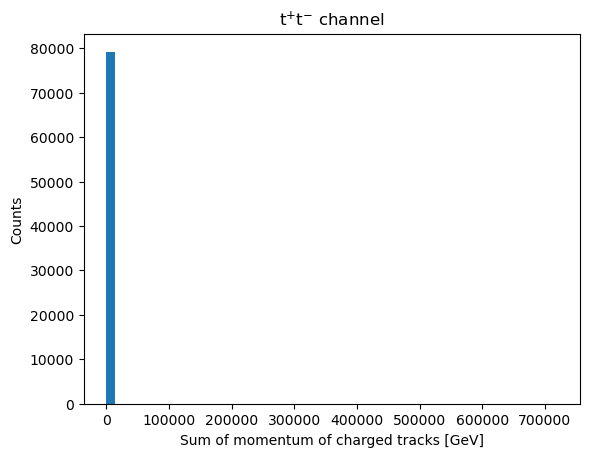

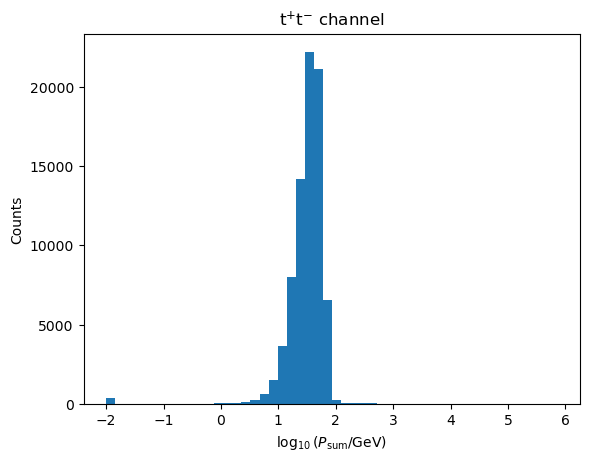

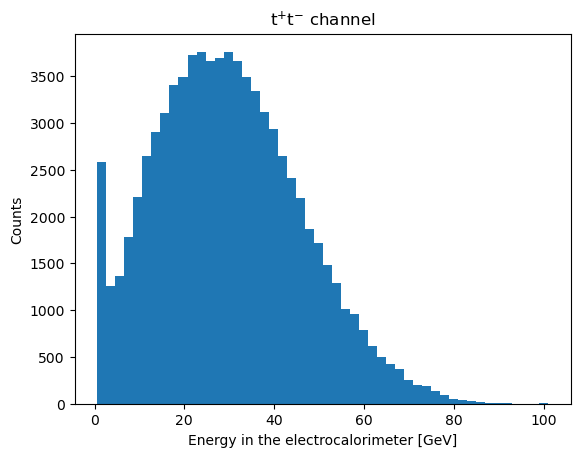

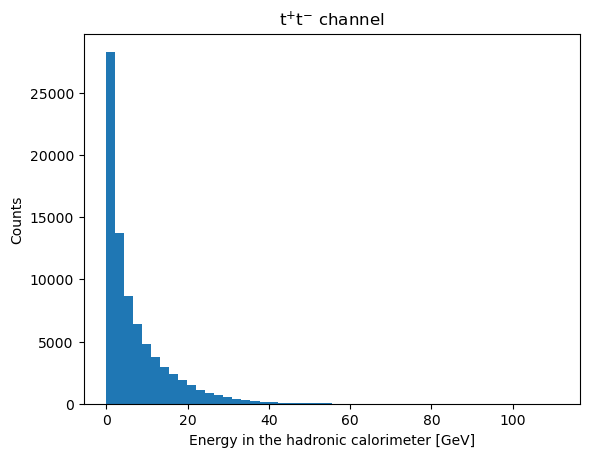

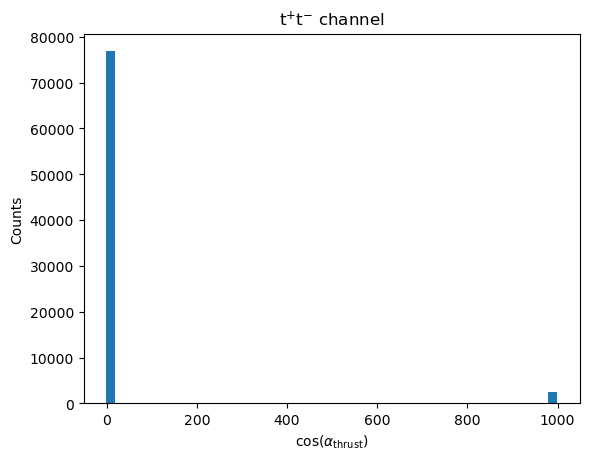

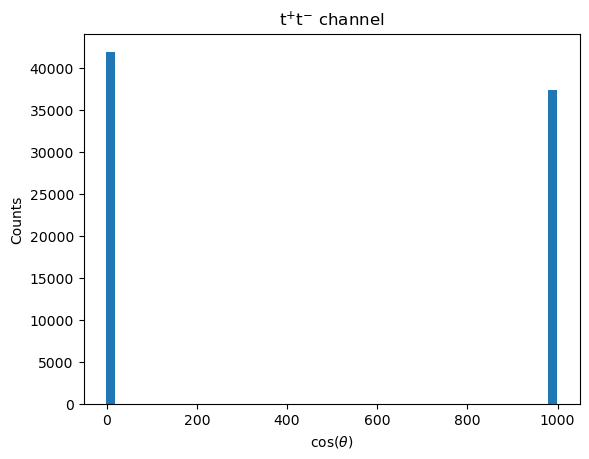

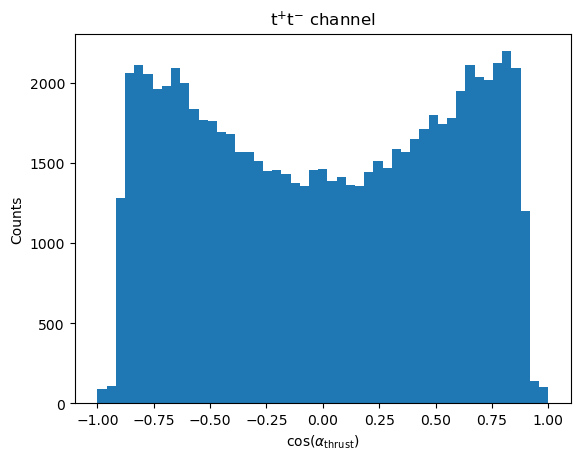

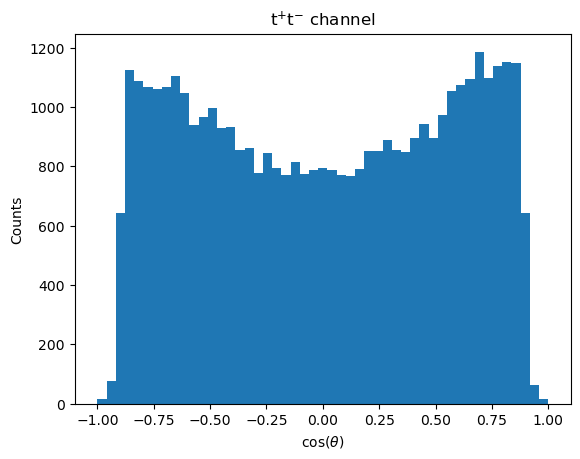

In [50]:
# Example for a single channel

file3 = uproot.open("../Data/MC/tt.root")
tree3 = file3['h3']

Ncharged3 = np.array(tree3['Ncharged'].array())
Pcharged3 = np.array(tree3['Pcharged'].array())
E_ecal3 = np.array(tree3['E_ecal'].array())
E_hcal3 = np.array(tree3['E_hcal'].array())
cos_thru3 = np.array(tree3['cos_thru'].array())
cos_thet3 = np.array(tree3['cos_thet'].array())


plt.hist(Ncharged3,bins=50)
plt.xlabel("Number of charges tracks")
plt.ylabel("Counts")
plt.title(r"$\rm{t^{+}t^{-}}$ channel")
plt.show()
# plt.savefig("../Figures/example.pdf") ## Use plt.savefig(<str filename>) to save the figures

plt.hist(Pcharged3,bins=50)
plt.xlabel("Sum of momentum of charged tracks [GeV]")
plt.ylabel("Counts")
plt.title(r"$\rm{t^{+}t^{-}}$ channel")
plt.show()

plt.hist(np.log10(Pcharged3+0.01),bins=50)
plt.xlabel(r"$\log_{10} (P_{\rm{sum}} / \rm{GeV})$")
plt.ylabel("Counts")
plt.title(r"$\rm{t^{+}t^{-}}$ channel")
plt.show()

plt.hist(E_ecal3,bins=50)
plt.xlabel("Energy in the electrocalorimeter [GeV]")
plt.ylabel("Counts")
plt.title(r"$\rm{t^{+}t^{-}}$ channel")
plt.show()

plt.hist(E_hcal3,bins=50)
plt.xlabel("Energy in the hadronic calorimeter [GeV]")
plt.ylabel("Counts")
plt.title(r"$\rm{t^{+}t^{-}}$ channel")
plt.show()

plt.hist(cos_thru3,bins=50)
plt.xlabel(r"$\cos(\alpha_{\rm{thrust}})$")
plt.ylabel("Counts")
plt.title(r"$\rm{t^{+}t^{-}}$ channel")
plt.show()

plt.hist(cos_thet3,bins=50)
plt.xlabel(r"$\cos(\theta)$")
plt.ylabel("Counts")
plt.title(r"$\rm{t^{+}t^{-}}$ channel")
plt.show()

plt.hist(cos_thru3,bins=np.linspace(-1,1,50))
plt.xlabel(r"$\cos(\alpha_{\rm{thrust}})$")
plt.ylabel("Counts")
plt.title(r"$\rm{t^{+}t^{-}}$ channel")
plt.show()

plt.hist(cos_thet3,bins=np.linspace(-1,1,50))
plt.xlabel(r"$\cos(\theta)$")
plt.ylabel("Counts")
plt.title(r"$\rm{t^{+}t^{-}}$ channel")
plt.show()

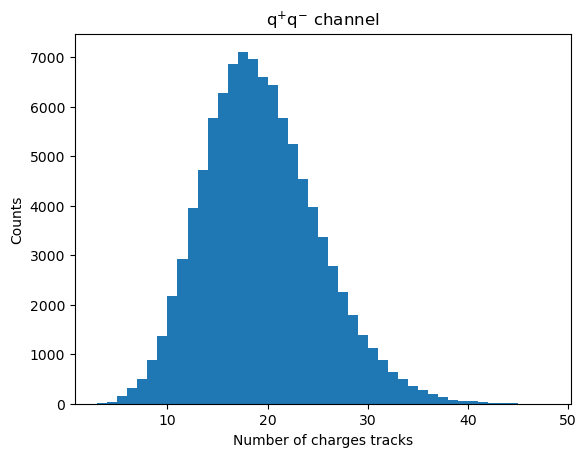

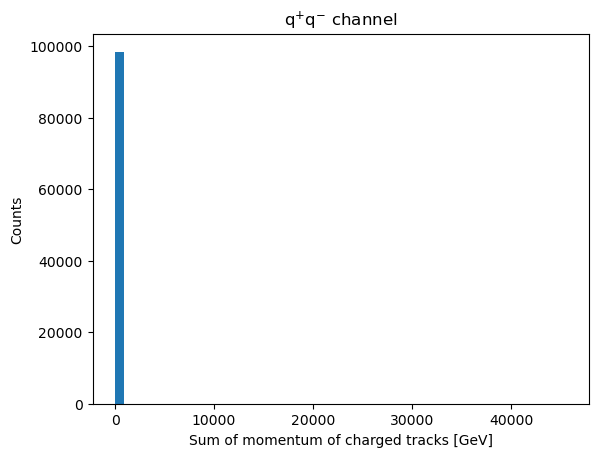

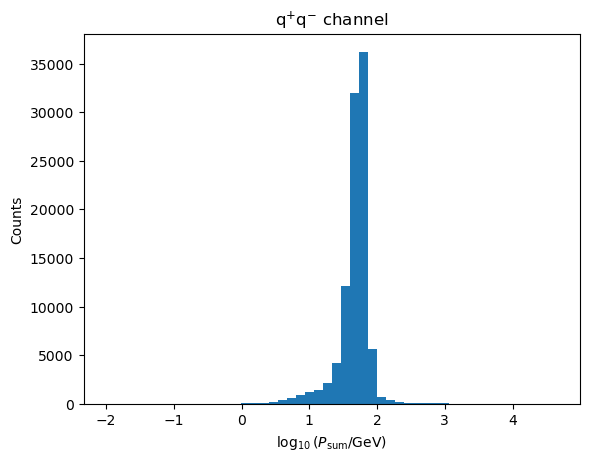

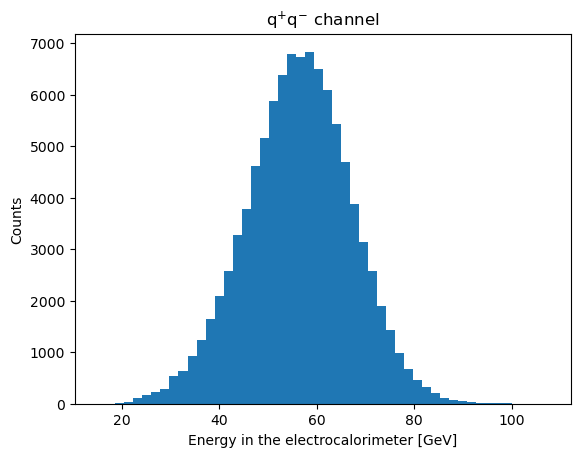

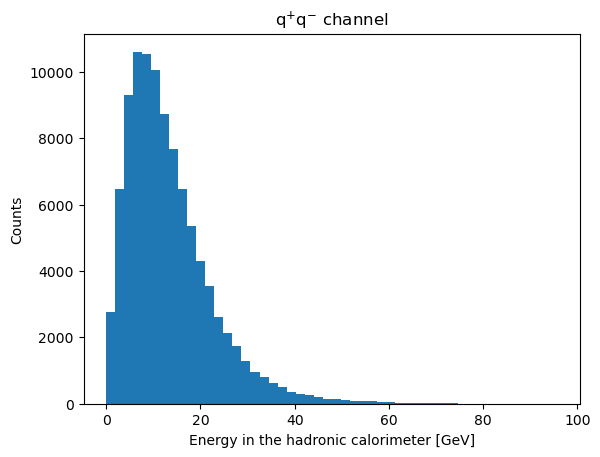

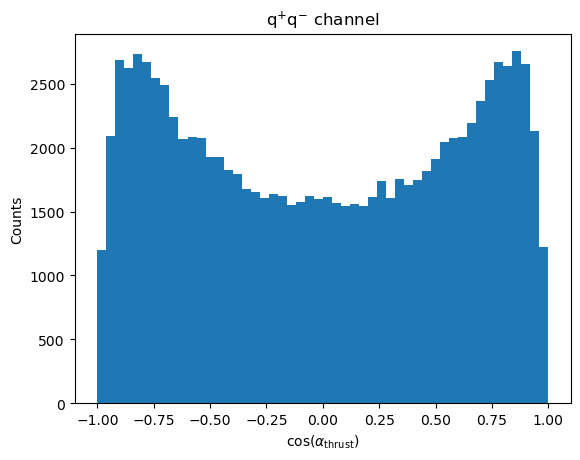

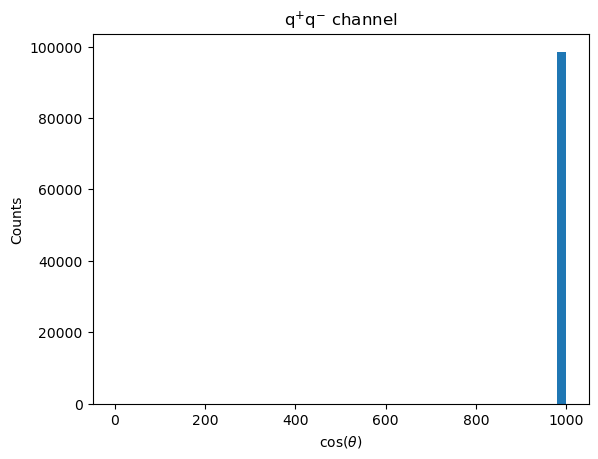

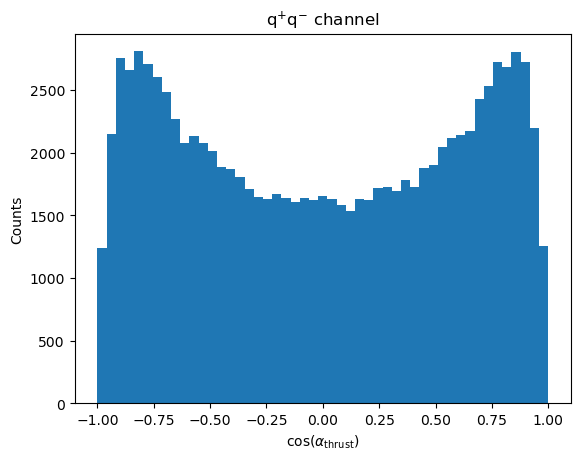

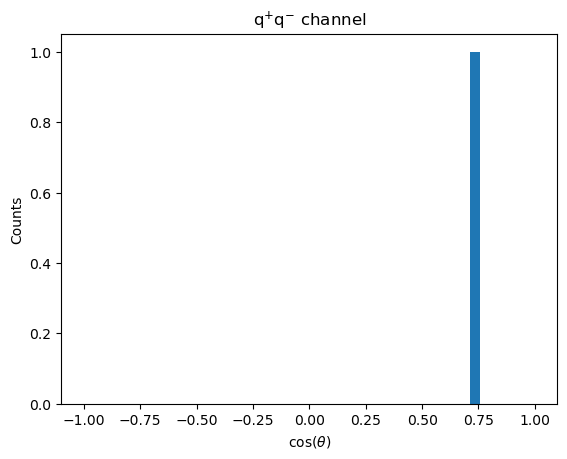

In [51]:
# Example for a single channel

file4 = uproot.open("../Data/MC/qq.root")
tree4 = file4['h3']

Ncharged4 = np.array(tree4['Ncharged'].array())
Pcharged4 = np.array(tree4['Pcharged'].array())
E_ecal4 = np.array(tree4['E_ecal'].array())
E_hcal4 = np.array(tree4['E_hcal'].array())
cos_thru4 = np.array(tree4['cos_thru'].array())
cos_thet4 = np.array(tree4['cos_thet'].array())


plt.hist(Ncharged4,bins=45)
plt.xlabel("Number of charges tracks")
plt.ylabel("Counts")
plt.title(r"$\rm{q^{+}q^{-}}$ channel")
plt.show()
# plt.savefig("../Figures/example.pdf") ## Use plt.savefig(<str filename>) to save the figures

plt.hist(Pcharged4,bins=50)
plt.xlabel("Sum of momentum of charged tracks [GeV]")
plt.ylabel("Counts")
plt.title(r"$\rm{q^{+}q^{-}}$ channel")
plt.show()

plt.hist(np.log10(Pcharged4+0.01),bins=50)
plt.xlabel(r"$\log_{10} (P_{\rm{sum}} / \rm{GeV})$")
plt.ylabel("Counts")
plt.title(r"$\rm{q^{+}q^{-}}$ channel")
plt.show()

plt.hist(E_ecal4,bins=50)
plt.xlabel("Energy in the electrocalorimeter [GeV]")
plt.ylabel("Counts")
plt.title(r"$\rm{q^{+}q^{-}}$ channel")
plt.show()

plt.hist(E_hcal4,bins=50)
plt.xlabel("Energy in the hadronic calorimeter [GeV]")
plt.ylabel("Counts")
plt.title(r"$\rm{q^{+}q^{-}}$ channel")
plt.show()

plt.hist(cos_thru4,bins=50)
plt.xlabel(r"$\cos(\alpha_{\rm{thrust}})$")
plt.ylabel("Counts")
plt.title(r"$\rm{q^{+}q^{-}}$ channel")
plt.show()

plt.hist(cos_thet4,bins=50)
plt.xlabel(r"$\cos(\theta)$")
plt.ylabel("Counts")
plt.title(r"$\rm{q^{+}q^{-}}$ channel")
plt.show()

plt.hist(cos_thru4,bins=np.linspace(-1,1,50))
plt.xlabel(r"$\cos(\alpha_{\rm{thrust}})$")
plt.ylabel("Counts")
plt.title(r"$\rm{q^{+}q^{-}}$ channel")
plt.show()

plt.hist(cos_thet4,bins=np.linspace(-1,1,50))
plt.xlabel(r"$\cos(\theta)$")
plt.ylabel("Counts")
plt.title(r"$\rm{q^{+}q^{-}}$ channel")
plt.show()



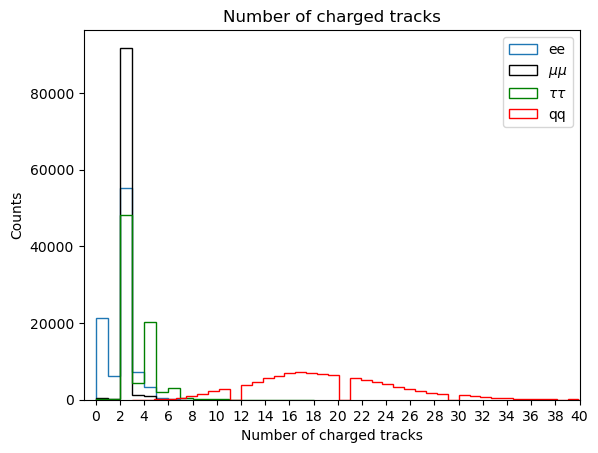

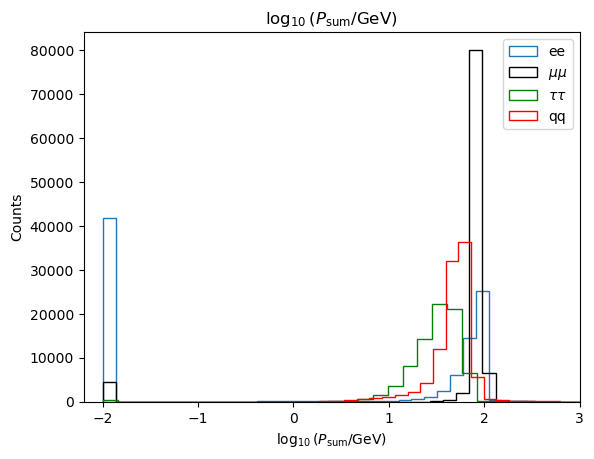

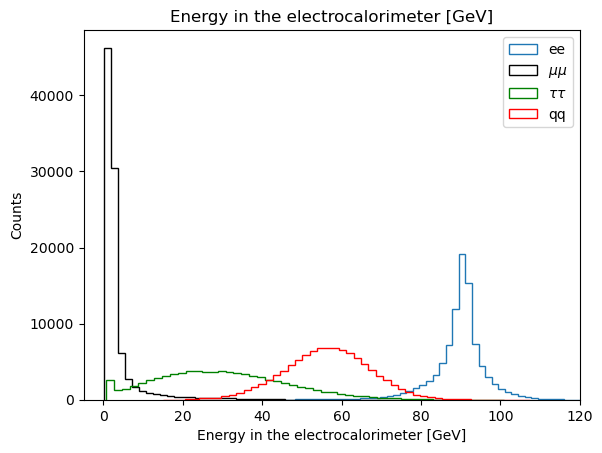

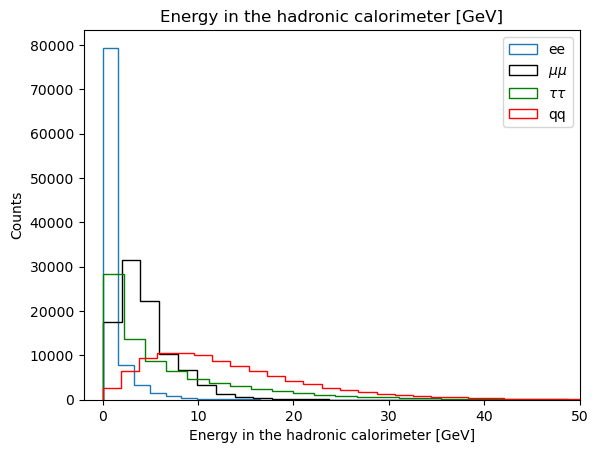

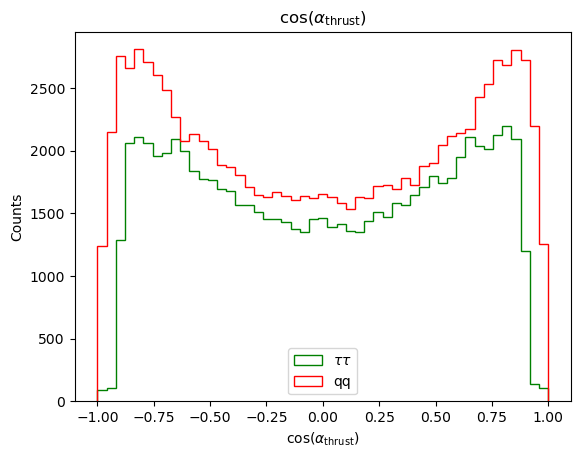

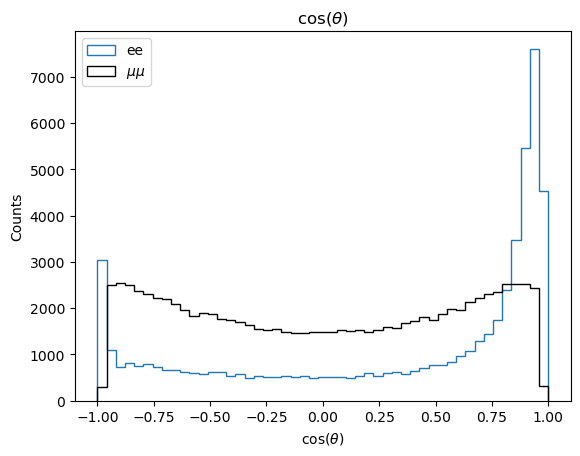

In [52]:
# all channels

plt.hist(Ncharged1,bins=9,histtype='step', label='ee') #histtype='step',
plt.hist(Ncharged2,bins=6,histtype='step', label=r'$\mu\mu$', color='black')
plt.hist(Ncharged3,bins=18,histtype='step', label=r'$\tau\tau$', color='green')
plt.hist(Ncharged4,bins=50,histtype='step', label='qq', color='red')
plt.xlabel("Number of charged tracks")
plt.ylabel("Counts")
plt.xlim([-1, 40])
#plt.ylim([0, 40000])
plt.xticks(np.linspace(0, 40, 21))
plt.title(r"Number of charged tracks")
plt.legend()
plt.show()
# plt.savefig("../Figures/example.pdf") ## Use plt.savefig(<str filename>) to save the figures

plt.hist(np.log10(Pcharged1+0.01),histtype='step',bins=50, label='ee')
plt.hist(np.log10(Pcharged2+0.01),histtype='step',bins=50, label=r'$\mu\mu$', color='black')
plt.hist(np.log10(Pcharged3+0.01),histtype='step',bins=50, label=r'$\tau\tau$', color='green')
plt.hist(np.log10(Pcharged4+0.01),histtype='step',bins=50, label='qq', color='red')
plt.xlabel(r"$\log_{10} (P_{\rm{sum}} / \rm{GeV})$")
plt.ylabel("Counts")
plt.xlim([-2.2, 3])
#plt.xticks([1.8])
plt.title(r"$\log_{10} (P_{\rm{sum}} / \rm{GeV})$")
plt.legend()
plt.show()

plt.hist(E_ecal1,histtype='step',bins=50, label='ee')
plt.hist(E_ecal2,histtype='step',bins=50, label=r'$\mu\mu$', color='black')
plt.hist(E_ecal3,histtype='step',bins=50, label=r'$\tau\tau$', color='green')
plt.hist(E_ecal4,histtype='step',bins=50, label='qq', color='red')
plt.xlabel("Energy in the electrocalorimeter [GeV]")
plt.ylabel("Counts")
plt.xlim([-5, 120])
plt.title("Energy in the electrocalorimeter [GeV]")
plt.legend()
plt.show()

plt.hist(E_hcal1,histtype='step',bins=50, label='ee')
plt.hist(E_hcal2,histtype='step',bins=50, label=r'$\mu\mu$', color='black')
plt.hist(E_hcal3,histtype='step',bins=50, label=r'$\tau\tau$', color='green')
plt.hist(E_hcal4,histtype='step',bins=50, label='qq', color='red')
plt.xlabel("Energy in the hadronic calorimeter [GeV]")
plt.ylabel("Counts")
plt.xlim([-2, 50])
plt.title("Energy in the hadronic calorimeter [GeV]")
plt.legend()
plt.show()

#plt.hist(cos_thru1,histtype='step',bins=np.linspace(-1,1,50), label='ee')
#plt.hist(cos_thru2,histtype='step',bins=np.linspace(-1,1,50), label=r'$\mu\mu$', color='black')
plt.hist(cos_thru3,histtype='step',bins=np.linspace(-1,1,50), label=r'$\tau\tau$', color='green')
plt.hist(cos_thru4,histtype='step',bins=np.linspace(-1,1,50), label='qq', color='red')
plt.xlabel(r"$\cos(\alpha_{\rm{thrust}})$")
plt.ylabel("Counts")
plt.title(r"$\cos(\alpha_{\rm{thrust}})$")
plt.legend()
plt.show()

plt.hist(cos_thet1,histtype='step',bins=np.linspace(-1,1,50), label='ee')
plt.hist(cos_thet2,histtype='step',bins=np.linspace(-1,1,50), label=r'$\mu\mu$', color='black')
#plt.hist(cos_thet3,histtype='step',bins=np.linspace(-1,1,50), label=r'$\tau\tau$', color='green')
#plt.hist(cos_thet4,histtype='step',bins=np.linspace(-1,1,50), label='qq', color='red')
plt.xlabel(r"$\cos(\theta)$")
plt.ylabel("Counts")
plt.title(r"$\cos(\theta)$")
plt.legend()
plt.show()

### Questions

Three plots were "redefined".

1. For $P_{\rm{sum}}$, we used log10 (and had to add 0.01). Why?
2. For the angles, we need to constrain to the physical values, i.e., $-1 < \cos(\theta) < 1$. What happened to the events with unphysical angles?

### Exercises

2.1.0. Every plot in this protocol/example notebook has been plotted with the standard style options. Are these the best options in general? For each case? Do you think you can come up with better looking/easier to read plots?

2.1.1. Obtain the same histogram for the other three channels (the input root files are located in the same folder).

2.1.2. Come up with a nice way to show the comparison between the four channels

## Part 2.2 - Separating s-t channels

For $\rm{e^{+}e^{-}}$ channel, not only annihiliation processes (s-channel) are present, but also scattering processes (t-channel). Nevertheless, the Z0 boson can only be produced in the first one and, thus, only those events contribute to the decay width. For that reason, those events must also be selected out.

The two channels differ on their angular distribution:

$\frac{d\sigma}{d\Omega} \alpha \left\{\begin{array}{@{}lr@{}}
        1+\cos^2(\theta), & \text{s-channel}\\
        (1-\cos \theta)^{-2}, & \text{t-channel}\\
        \end{array}\right.$

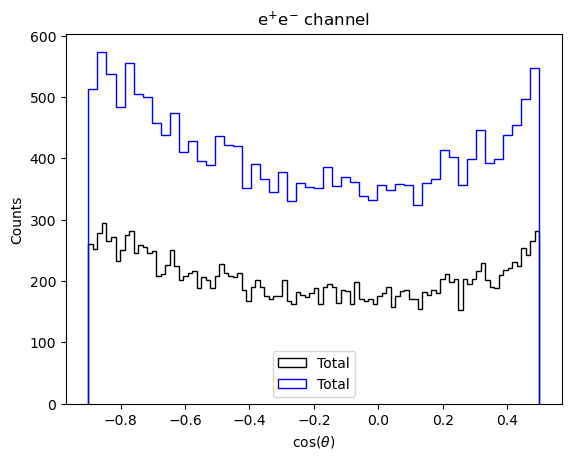

In [67]:
'''
file = uproot.open("../Data/MC/ee.root")
tree = file['h3']




cos_thet1 = np.array(tree1['cos_thet'].array())
'''
# A first safe cos_theta cut must be applied

mask_safe = (cos_thet1>-0.9) & (cos_thet1<0.5)

data_hist = plt.hist(cos_thet1[mask_safe],bins=np.linspace(-0.9,0.5,101),color='black',label='Total',histtype='step')
data_hist = plt.hist(cos_thet1[mask_safe],bins=np.linspace(-0.9,0.5,51),color='blue',label='Total',histtype='step')
plt.xlabel(r"$\cos(\theta)$")
plt.ylabel("Counts")
plt.title(r"$\rm{e^{+}e^{-}}$ channel")
plt.legend()
plt.show()

We now define a fit function of the type:

$a (1+\cos^2(\theta)) + b (1-\cos \theta)^2$

where $a$ and $b$ are free parameters

In [57]:
def fitFunction(x,a,b):
    
    return(a*(1+x*x) + b*1/(1-x)**2)
def schannel(a,x):
    return a*(1+x*+2)
def tchannel(b,x):
    return b*1/((1-x)**2)

Fitted parameters:
a = 156.06058080097526 +- 1.7458652099431065
b = 16.390767619968333 +- 1.561544604844964


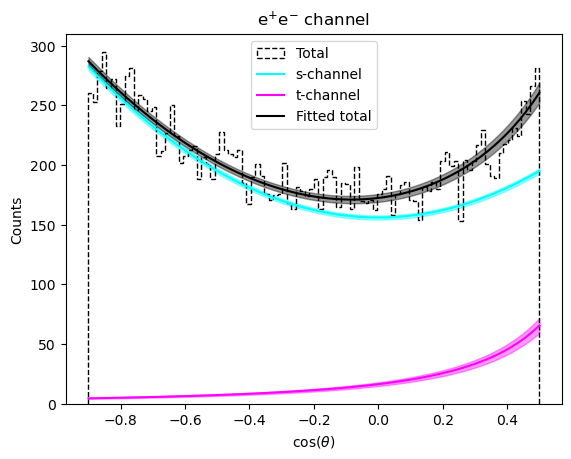

In [58]:
popt, pcov = curve_fit(fitFunction, data_hist[1][:-1] + (data_hist[1][1] - data_hist[1][0])/2., data_hist[0])
print("Fitted parameters:")
print(f"a = {popt[0]} +- { np.sqrt(np.diag(pcov))[0] }")
print(f"b = {popt[1]} +- { np.sqrt(np.diag(pcov))[1] }")

plt.hist(cos_thet1[mask_safe],bins=np.linspace(-0.9,0.5,101),color='black',label='Total',histtype='step',linestyle='--')
plt.plot(np.linspace(-0.9,0.5,101),popt[0] * (1+np.linspace(-0.9,0.5,101) ** 2),label='s-channel',color='cyan')
plt.fill_between(np.linspace(-0.9,0.5,101),(popt[0]-np.sqrt(np.diag(pcov))[0]) * (1+np.linspace(-0.9,0.5,101) ** 2),(popt[0]+np.sqrt(np.diag(pcov))[0]) * (1+np.linspace(-0.9,0.5,101) ** 2),alpha=0.4,color='cyan')
plt.plot(np.linspace(-0.9,0.5,101),popt[1] * 1/(1-np.linspace(-0.9,0.5,101)) ** 2,label='t-channel',color='magenta')
plt.fill_between(np.linspace(-0.9,0.5,101),(popt[1]-np.sqrt(np.diag(pcov))[1]) * 1/(1-np.linspace(-0.9,0.5,101)) ** 2,(popt[1]+np.sqrt(np.diag(pcov))[1]) * 1/(1-np.linspace(-0.9,0.5,101)) ** 2,alpha=0.4,color='magenta')
plt.plot(np.linspace(-0.9,0.5,101),popt[0] * (1+np.linspace(-0.9,0.5,101) ** 2) + popt[1] * 1/(1-np.linspace(-0.9,0.5,101)) ** 2,color='black',label='Fitted total')
plt.fill_between(np.linspace(-0.9,0.5,101),(popt[0]-np.sqrt(np.diag(pcov))[0]) * (1+np.linspace(-0.9,0.5,101) ** 2) + (popt[1]-np.sqrt(np.diag(pcov))[1]) * 1/(1-np.linspace(-0.9,0.5,101)) ** 2,(popt[0]+np.sqrt(np.diag(pcov))[0]) * (1+np.linspace(-0.9,0.5,101) ** 2) + (popt[1]+np.sqrt(np.diag(pcov))[1]) * 1/(1-np.linspace(-0.9,0.5,101)) ** 2,alpha=0.4,color='black')

plt.xlabel(r"$\cos(\theta)$")
plt.ylabel("Counts")
plt.title(r"$\rm{e^{+}e^{-}}$ channel")
plt.legend()
plt.show()

### Exercises

Using the results of the fit:

2.2.1. Calculate the fraction of s-channel events in the region $\cos \theta \in [-0.9,0.5]$

2.2.2. Calculate the total number of s-channel events in $\cos \theta \in [-1,1]$

In [69]:
Ob1 = 0.5
U1 = -0.9

Ob2 = 1
U2 = -1

fracSChannel = popt[0]*(Ob1-U1+1/3*(Ob1**3-U1**3)) / (popt[0]*(Ob1-U1+1/3*(Ob1**3-U1**3))+popt[1]*(1/(1-Ob1)-1/(1-U1))) # from 2.2.1.
totalSChannel = popt[0]*(Ob2-U2+1/3*(Ob2**3-U2**3)) #/ (popt[0]*(Ob2-U2+1/3*(Ob2**3-U2**3))+popt[1]*(1/(1-Ob2)-1/(1-U2))) # from 2.2.2.

print(fracSChannel)
print(totalSChannel)

f_corr = fracSChannel*1e5/totalSChannel / 101

print(f_corr)
print((popt[0]*(Ob1-U1+1/3*(Ob1**3-U1**3))+popt[1]*(1/(1-Ob1)-1/(1-U1))))
print(popt[0]*(Ob1-U1+1/3*(Ob1**3-U1**3)))

0.9158559000544781
416.1615488026007
2.1789327304864456
287.0648738959963
262.910058456043


## Part 2.3 - Defining selection cuts

As we just learned, events cannot be singularly defined, but they can be defined by their distributions. The idea of this part if to come up with four sets of cuts to separate the four channels

### Exercises

2.3.1. Come up with four sets of cuts, one for each channel and show the impact on the histograms for every channel for each cut.

2.3.2. Build a 4x4 matrix containing the fraction of events of MC simulations of channel $i$ surviving the cuts to select events of channel $j$.

2.3.3. Correct all the entries in the matrix for MC simulations of channel e+e- in order to keep only s-channel events using the numbers fracSChannel and totalSChannel calculated in the previous step.

### Questions

1. There are two numbers to calculate the fraction of surviving events. Either dividing by the number of events without cuts or diving by 100000 which is the initial number of MC simulations. Why are those numbers different? Which one should be used?
2. In an ideal world how do we expect this 4x4 matrix to look like?
3. How can measure which of two possible 4x4 matrices is better?

0.212564764077525 (19939/93802) events of channel ee surviving ee cuts
0.19939 (19939/100000) events of channel ee surviving ee cuts

0.0 (0/93802) events of channel ee surviving mm cuts
0.0 (0/100000) events of channel ee surviving mm cuts

0.00211082919340739 (198/93802) events of channel ee surviving tt cuts
0.00198 (198/100000) events of channel ee surviving tt cuts

0.00019189356303703545 (18/93802) events of channel ee surviving qq cuts
0.00018 (18/100000) events of channel ee surviving qq cuts


<>:46: SyntaxWarning: invalid escape sequence '\m'
<>:90: SyntaxWarning: invalid escape sequence '\c'
<>:46: SyntaxWarning: invalid escape sequence '\m'
<>:90: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_92146/3692241209.py:46: SyntaxWarning: invalid escape sequence '\m'
  '''
/tmp/ipykernel_92146/3692241209.py:90: SyntaxWarning: invalid escape sequence '\c'
  '''


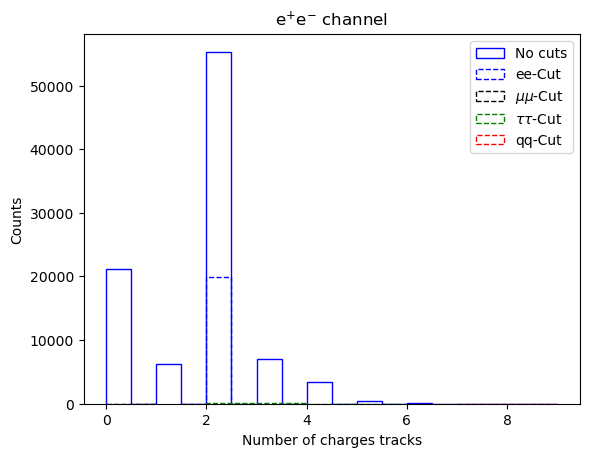

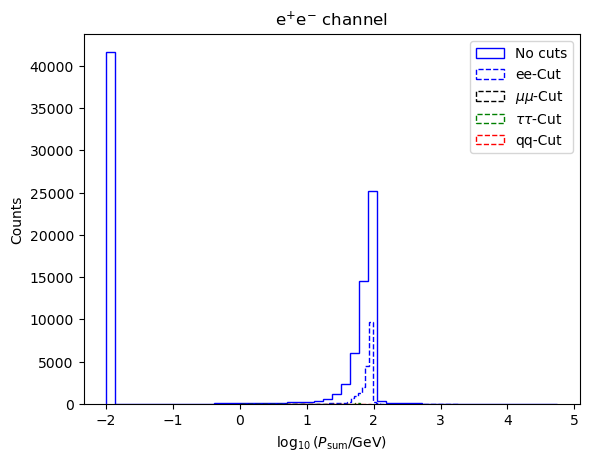

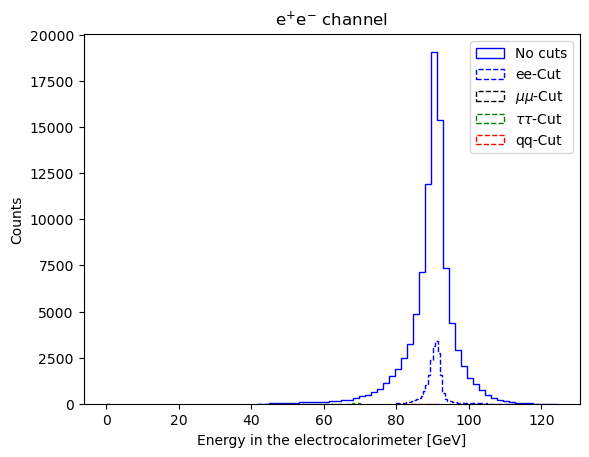

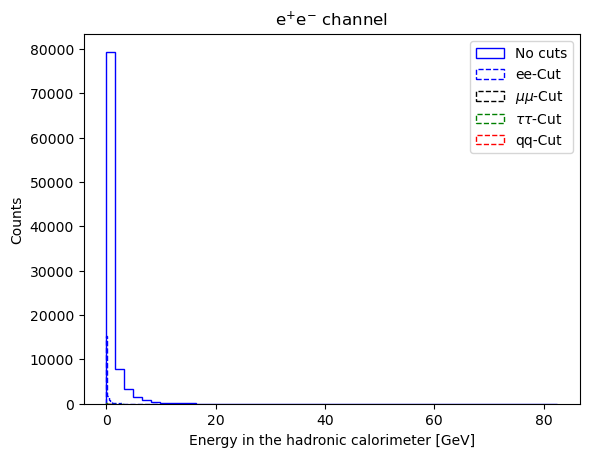

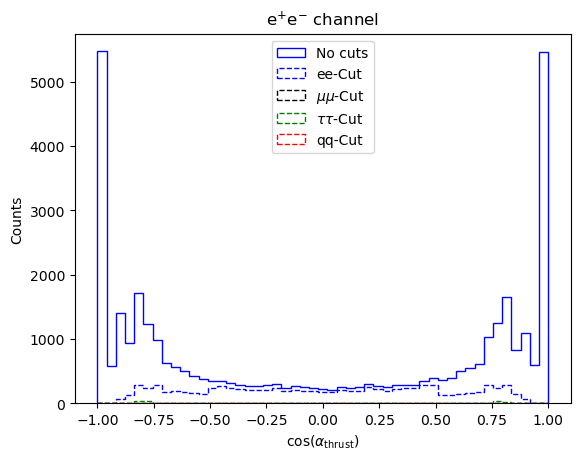

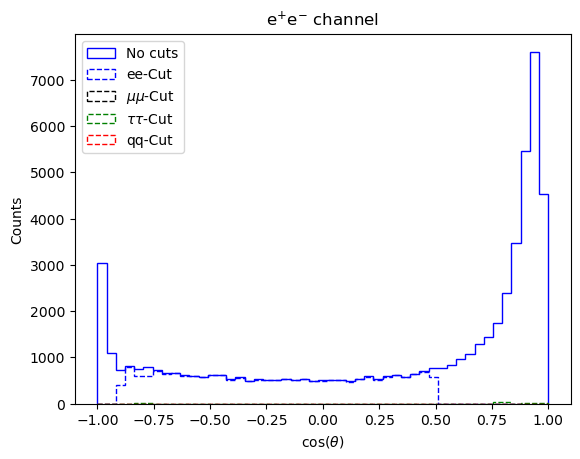

In [70]:
# Example for a single channel
'''
file = uproot.open("../Data/MC/ee.root")
tree = file['h3']

Ncharged = np.array(tree['Ncharged'].array())
Pcharged = np.array(tree['Pcharged'].array())
E_ecal = np.array(tree['E_ecal'].array())
E_hcal = np.array(tree['E_hcal'].array())
cos_thru = np.array(tree['cos_thru'].array())
cos_thet = np.array(tree['cos_thet'].array())
'''
mask_safe1 = (cos_thet1>-0.9) & (cos_thet1<0.5) # If looking for ee, this cut must be kept due to the s-t contamination! For other channels this can (and maybe should) be taken out
mask1 = (mask_safe1) & (Ncharged1 == 2) & (E_ecal1 > 80) & (E_hcal1 < 11) # completely random cuts, just to show the syntax needed!
mask2 = (Ncharged1 == 2) & (np.log10(Pcharged1+0.01) > 1.8) & (E_ecal1 < 9)
mask3 = (Ncharged1 > 1) & (Ncharged1 < 7) & (np.log10(Pcharged1+0.01) > 0) & (np.log10(Pcharged1+0.01) < 1.8) & (E_ecal1 > 10) & (E_ecal1 < 70) 
mask4 = (Ncharged1 > 6) & (np.log10(Pcharged1+0.01) > 0)

print(f"{len(E_ecal1[mask1])/len(E_ecal1)} ({len(E_ecal1[mask1])}/{len(E_ecal1)}) events of channel ee surviving ee cuts")
print(f"{len(E_ecal1[mask1])/100000} ({len(E_ecal1[mask1])}/100000) events of channel ee surviving ee cuts")
print()
print(f"{len(E_ecal1[mask2])/len(E_ecal1)} ({len(E_ecal1[mask2])}/{len(E_ecal1)}) events of channel ee surviving mm cuts")
print(f"{len(E_ecal1[mask2])/100000} ({len(E_ecal1[mask2])}/100000) events of channel ee surviving mm cuts")
print()
print(f"{len(E_ecal1[mask3])/len(E_ecal1)} ({len(E_ecal1[mask3])}/{len(E_ecal1)}) events of channel ee surviving tt cuts")
print(f"{len(E_ecal1[mask3])/100000} ({len(E_ecal1[mask3])}/100000) events of channel ee surviving tt cuts")
print()
print(f"{len(E_ecal1[mask4])/len(E_ecal1)} ({len(E_ecal1[mask4])}/{len(E_ecal1)}) events of channel ee surviving qq cuts")
print(f"{len(E_ecal1[mask4])/100000} ({len(E_ecal1[mask4])}/100000) events of channel ee surviving qq cuts")

N11 = len(E_ecal1[mask1])/100000
N21 = len(E_ecal1[mask2])/100000
N31 = len(E_ecal1[mask3])/100000
N41 = len(E_ecal1[mask4])/100000

plt.hist(Ncharged1,bins=18,color='blue',label='No cuts',histtype='step')
plt.hist(Ncharged1[mask1],bins=2,color='blue',linestyle='--',label=r'ee-Cut',histtype='step')
plt.hist(Ncharged1[mask2],bins=2,color='black',linestyle='--',label=r'$\mu\mu$-Cut',histtype='step')
plt.hist(Ncharged1[mask3],bins=2,color='green',linestyle='--',label=r'$\tau\tau$-Cut',histtype='step')
plt.hist(Ncharged1[mask4],bins=2,color='red',linestyle='--',label=r'qq-Cut',histtype='step')
plt.xlabel("Number of charges tracks")
plt.ylabel("Counts")
plt.title(r"$\rm{e^{+}e^{-}}$ channel")
plt.legend()
plt.show()
'''
plt.hist(Pcharged1,bins=50,color='blue',label='No cuts',histtype='step')
plt.hist(Pcharged1[mask1],bins=50,color='blue',linestyle='--',label=r'ee-Cut',histtype='step')
plt.hist(Pcharged1[mask2],bins=50,color='black',linestyle='--',label=r'$\mu\mu$-Cut',histtype='step')
plt.hist(Pcharged1[mask3],bins=50,color='green',linestyle='--',label=r'$\tau\tau$-Cut',histtype='step')
plt.hist(Pcharged1[mask4],bins=50,color='red',linestyle='--',label=r'qq-Cut',histtype='step')
plt.xlabel("Sum of momentum of charged tracks [GeV]")
plt.ylabel("Counts")
plt.title(r"$\rm{e^{+}e^{-}}$ channel")
plt.legend()
plt.show()
'''
plt.hist(np.log10(Pcharged1+0.01),bins=50,color='blue',label='No cuts',histtype='step')
plt.hist(np.log10(Pcharged1[mask1]+0.01),bins=50,color='blue',linestyle='--',label=r'ee-Cut',histtype='step')
plt.hist(np.log10(Pcharged1[mask2]+0.01),bins=50,color='black',linestyle='--',label=r'$\mu\mu$-Cut',histtype='step')
plt.hist(np.log10(Pcharged1[mask3]+0.01),bins=50,color='green',linestyle='--',label=r'$\tau\tau$-Cut',histtype='step')
plt.hist(np.log10(Pcharged1[mask4]+0.01),bins=50,color='red',linestyle='--',label=r'qq-Cut',histtype='step')
plt.xlabel(r"$\log_{10} (P_{\rm{sum}} / \rm{GeV})$")
plt.ylabel("Counts")
plt.title(r"$\rm{e^{+}e^{-}}$ channel")
plt.legend()
plt.show()

plt.hist(E_ecal1,bins=50,color='blue',label='No cuts',histtype='step')
plt.hist(E_ecal1[mask1],bins=50,color='blue',linestyle='--',label=r'ee-Cut',histtype='step')
plt.hist(E_ecal1[mask2],bins=50,color='black',linestyle='--',label=r'$\mu\mu$-Cut',histtype='step')
plt.hist(E_ecal1[mask3],bins=50,color='green',linestyle='--',label=r'$\tau\tau$-Cut',histtype='step')
plt.hist(E_ecal1[mask4],bins=50,color='red',linestyle='--',label=r'qq-Cut',histtype='step')
plt.xlabel("Energy in the electrocalorimeter [GeV]")
plt.ylabel("Counts")
plt.title(r"$\rm{e^{+}e^{-}}$ channel")
plt.legend()
plt.show()

plt.hist(E_hcal1,bins=50,color='blue',label='No cuts',histtype='step')
plt.hist(E_hcal1[mask1],bins=50,color='blue',linestyle='--',label=r'ee-Cut',histtype='step')
plt.hist(E_hcal1[mask2],bins=50,color='black',linestyle='--',label=r'$\mu\mu$-Cut',histtype='step')
plt.hist(E_hcal1[mask3],bins=50,color='green',linestyle='--',label=r'$\tau\tau$-Cut',histtype='step')
plt.hist(E_hcal1[mask4],bins=50,color='red',linestyle='--',label=r'qq-Cut',histtype='step')
plt.xlabel("Energy in the hadronic calorimeter [GeV]")
plt.ylabel("Counts")
plt.title(r"$\rm{e^{+}e^{-}}$ channel")
plt.legend()
plt.show()
'''
plt.hist(cos_thru1,bins=50,color='black',label='No cuts',histtype='step')
plt.hist(cos_thru1[mask1],bins=50,color='red',linestyle='--',label='Cuts',histtype='step')
plt.xlabel(r"$\cos(\alpha_{\rm{thrust}})$")
plt.ylabel("Counts")
plt.title(r"$\rm{e^{+}e^{-}}$ channel")
plt.legend()
plt.show()

plt.hist(cos_thet1,bins=50,color='black',label='No cuts',histtype='step')
plt.hist(cos_thet1[mask1],bins=50,color='red',linestyle='--',label='Cuts',histtype='step')
plt.xlabel(r"$\cos(\theta)$")
plt.ylabel("Counts")
plt.title(r"$\rm{e^{+}e^{-}}$ channel")
plt.legend()
plt.show()
'''
plt.hist(cos_thru1,bins=np.linspace(-1,1,50),color='blue',label='No cuts',histtype='step')
plt.hist(cos_thru1[mask1],bins=np.linspace(-1,1,50),color='blue',linestyle='--',label=r'ee-Cut',histtype='step')
plt.hist(cos_thru1[mask2],bins=np.linspace(-1,1,50),color='black',linestyle='--',label=r'$\mu\mu$-Cut',histtype='step')
plt.hist(cos_thru1[mask3],bins=np.linspace(-1,1,50),color='green',linestyle='--',label=r'$\tau\tau$-Cut',histtype='step')
plt.hist(cos_thru1[mask4],bins=np.linspace(-1,1,50),color='red',linestyle='--',label=r'qq-Cut',histtype='step')
plt.xlabel(r"$\cos(\alpha_{\rm{thrust}})$")
plt.ylabel("Counts")
plt.title(r"$\rm{e^{+}e^{-}}$ channel")
plt.legend()
plt.show()

plt.hist(cos_thet1,bins=np.linspace(-1,1,50),color='blue',label='No cuts',histtype='step')
plt.hist(cos_thet1[mask1],bins=np.linspace(-1,1,50),color='blue',linestyle='--',label=r'ee-Cut',histtype='step')
plt.hist(cos_thet1[mask2],bins=np.linspace(-1,1,50),color='black',linestyle='--',label=r'$\mu\mu$-Cut',histtype='step')
plt.hist(cos_thet1[mask3],bins=np.linspace(-1,1,50),color='green',linestyle='--',label=r'$\tau\tau$-Cut',histtype='step')
plt.hist(cos_thet1[mask4],bins=np.linspace(-1,1,50),color='red',linestyle='--',label=r'qq-Cut',histtype='step')
plt.xlabel(r"$\cos(\theta)$")
plt.ylabel("Counts")
plt.title(r"$\rm{e^{+}e^{-}}$ channel")
plt.legend()
plt.show()

0.0 (0/94381) events of channel mm surviving ee cuts
0.0 (0/100000) events of channel mm surviving ee cuts

0.8587639461332259 (81051/94381) events of channel mm surviving mm cuts
0.81051 (81051/100000) events of channel mm surviving mm cuts

0.0125872792193344 (1188/94381) events of channel mm surviving tt cuts
0.01188 (1188/100000) events of channel mm surviving tt cuts

0.0 (0/94381) events of channel mm surviving qq cuts
0.0 (0/100000) events of channel mm surviving qq cuts


<>:34: SyntaxWarning: invalid escape sequence '\m'
<>:78: SyntaxWarning: invalid escape sequence '\c'
<>:34: SyntaxWarning: invalid escape sequence '\m'
<>:78: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_92146/3445237512.py:34: SyntaxWarning: invalid escape sequence '\m'
  '''
/tmp/ipykernel_92146/3445237512.py:78: SyntaxWarning: invalid escape sequence '\c'
  '''


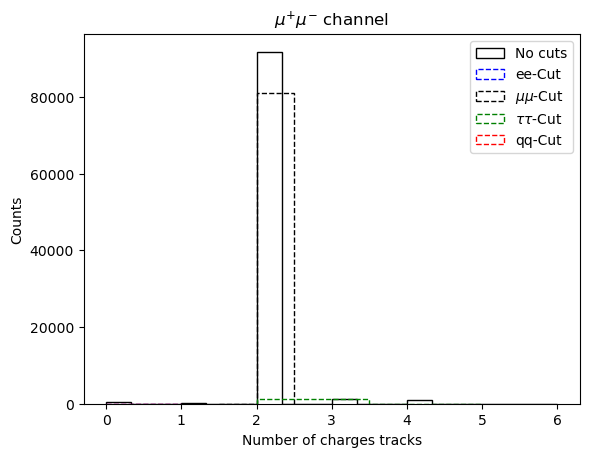

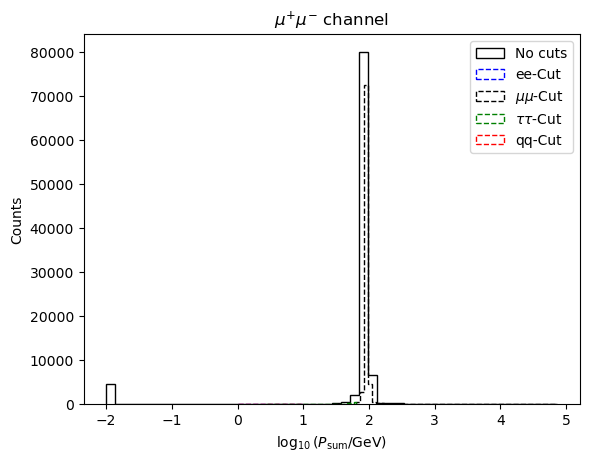

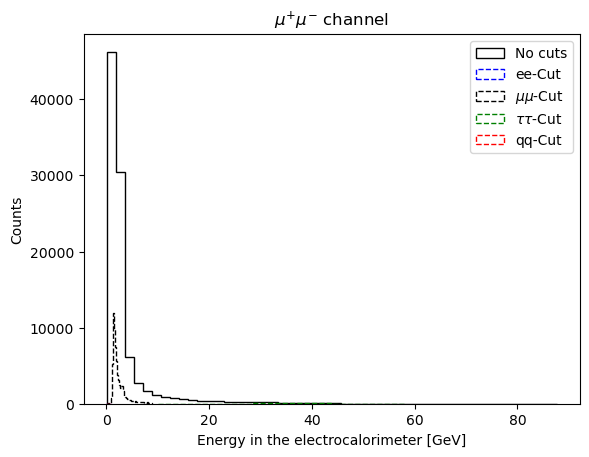

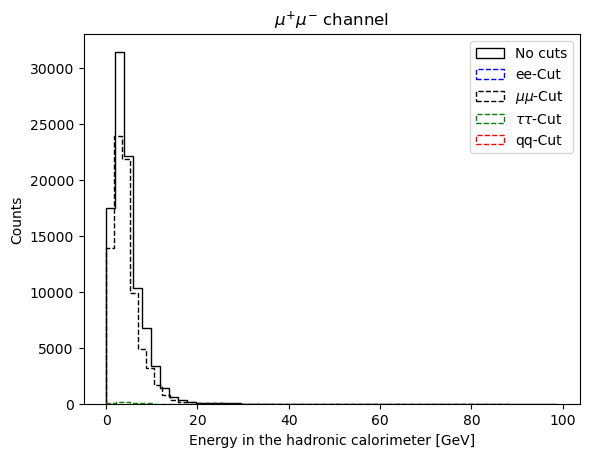

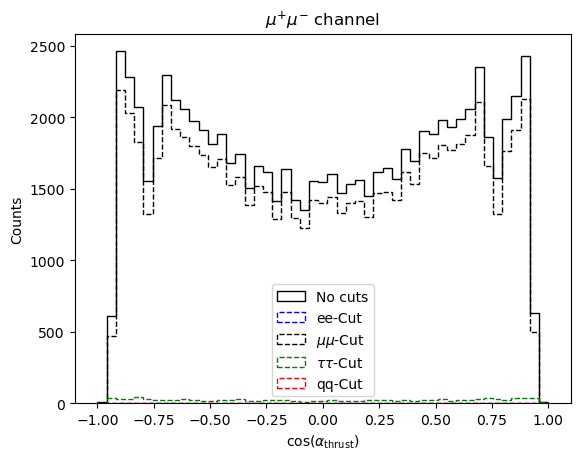

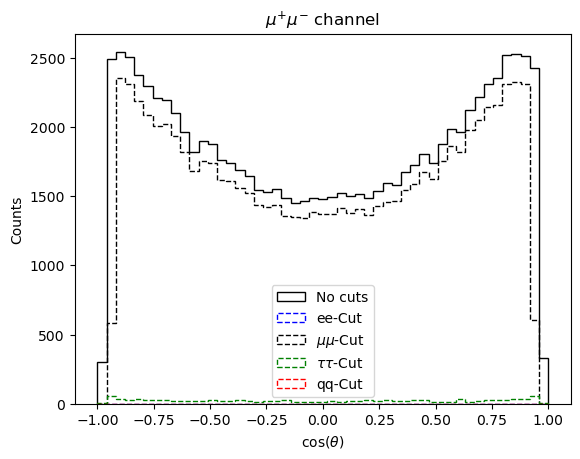

In [71]:
mask_safe1 = (cos_thet2>-0.9) & (cos_thet2<0.5) # If looking for ee, this cut must be kept due to the s-t contamination! For other channels this can (and maybe should) be taken out
mask1 = (mask_safe1) & (Ncharged2 == 2) & (E_ecal2 > 80) & (E_hcal2 < 11) # completely random cuts, just to show the syntax needed!
mask2 = (Ncharged2 == 2) & (np.log10(Pcharged2+0.01) > 1.8) & (E_ecal2 < 9)
mask3 = (Ncharged2 > 1) & (Ncharged2 < 7) & (np.log10(Pcharged2+0.01) > 0) & (np.log10(Pcharged2+0.01) < 1.8) & (E_ecal2 > 10) & (E_ecal2 < 70) 
mask4 = (Ncharged2 > 6) & (np.log10(Pcharged2+0.01) > 0)

print(f"{len(E_ecal2[mask1])/len(E_ecal2)} ({len(E_ecal2[mask1])}/{len(E_ecal2)}) events of channel mm surviving ee cuts")
print(f"{len(E_ecal2[mask1])/100000} ({len(E_ecal2[mask1])}/100000) events of channel mm surviving ee cuts")
print()
print(f"{len(E_ecal2[mask2])/len(E_ecal2)} ({len(E_ecal2[mask2])}/{len(E_ecal2)}) events of channel mm surviving mm cuts")
print(f"{len(E_ecal2[mask2])/100000} ({len(E_ecal2[mask2])}/100000) events of channel mm surviving mm cuts")
print()
print(f"{len(E_ecal2[mask3])/len(E_ecal2)} ({len(E_ecal2[mask3])}/{len(E_ecal2)}) events of channel mm surviving tt cuts")
print(f"{len(E_ecal2[mask3])/100000} ({len(E_ecal2[mask3])}/100000) events of channel mm surviving tt cuts")
print()
print(f"{len(E_ecal2[mask4])/len(E_ecal2)} ({len(E_ecal2[mask4])}/{len(E_ecal2)}) events of channel mm surviving qq cuts")
print(f"{len(E_ecal2[mask4])/100000} ({len(E_ecal2[mask4])}/100000) events of channel mm surviving qq cuts")

N12 = len(E_ecal2[mask1])/100000
N22 = len(E_ecal2[mask2])/100000
N32 = len(E_ecal2[mask3])/100000
N42 = len(E_ecal2[mask4])/100000

plt.hist(Ncharged2,bins=18,color='black',label='No cuts',histtype='step')
plt.hist(Ncharged2[mask1],bins=2,color='blue',linestyle='--',label=r'ee-Cut',histtype='step')
plt.hist(Ncharged2[mask2],bins=2,color='black',linestyle='--',label=r'$\mu\mu$-Cut',histtype='step')
plt.hist(Ncharged2[mask3],bins=2,color='green',linestyle='--',label=r'$\tau\tau$-Cut',histtype='step')
plt.hist(Ncharged2[mask4],bins=2,color='red',linestyle='--',label=r'qq-Cut',histtype='step')
plt.xlabel("Number of charges tracks")
plt.ylabel("Counts")
plt.title(r"${\mu^{+}\mu^{-}}$ channel")
plt.legend()
plt.show()
'''
plt.hist(Pcharged1,bins=50,color='blue',label='No cuts',histtype='step')
plt.hist(Pcharged1[mask1],bins=50,color='blue',linestyle='--',label=r'ee-Cut',histtype='step')
plt.hist(Pcharged1[mask2],bins=50,color='black',linestyle='--',label=r'$\mu\mu$-Cut',histtype='step')
plt.hist(Pcharged1[mask3],bins=50,color='green',linestyle='--',label=r'$\tau\tau$-Cut',histtype='step')
plt.hist(Pcharged1[mask4],bins=50,color='red',linestyle='--',label=r'qq-Cut',histtype='step')
plt.xlabel("Sum of momentum of charged tracks [GeV]")
plt.ylabel("Counts")
plt.title(r"${\mu^{+}\mu^{-}}$ channel")
plt.legend()
plt.show()
'''
plt.hist(np.log10(Pcharged2+0.01),bins=50,color='black',label='No cuts',histtype='step')
plt.hist(np.log10(Pcharged2[mask1]+0.01),bins=50,color='blue',linestyle='--',label=r'ee-Cut',histtype='step')
plt.hist(np.log10(Pcharged2[mask2]+0.01),bins=50,color='black',linestyle='--',label=r'$\mu\mu$-Cut',histtype='step')
plt.hist(np.log10(Pcharged2[mask3]+0.01),bins=50,color='green',linestyle='--',label=r'$\tau\tau$-Cut',histtype='step')
plt.hist(np.log10(Pcharged2[mask4]+0.01),bins=50,color='red',linestyle='--',label=r'qq-Cut',histtype='step')
plt.xlabel(r"$\log_{10} (P_{\rm{sum}} / \rm{GeV})$")
plt.ylabel("Counts")
plt.title(r"${\mu^{+}\mu^{-}}$ channel")
plt.legend()
plt.show()

plt.hist(E_ecal2,bins=50,color='black',label='No cuts',histtype='step')
plt.hist(E_ecal2[mask1],bins=50,color='blue',linestyle='--',label=r'ee-Cut',histtype='step')
plt.hist(E_ecal2[mask2],bins=50,color='black',linestyle='--',label=r'$\mu\mu$-Cut',histtype='step')
plt.hist(E_ecal2[mask3],bins=50,color='green',linestyle='--',label=r'$\tau\tau$-Cut',histtype='step')
plt.hist(E_ecal2[mask4],bins=50,color='red',linestyle='--',label=r'qq-Cut',histtype='step')
plt.xlabel("Energy in the electrocalorimeter [GeV]")
plt.ylabel("Counts")
plt.title(r"${\mu^{+}\mu^{-}}$ channel")
plt.legend()
plt.show()

plt.hist(E_hcal2,bins=50,color='black',label='No cuts',histtype='step')
plt.hist(E_hcal2[mask1],bins=50,color='blue',linestyle='--',label=r'ee-Cut',histtype='step')
plt.hist(E_hcal2[mask2],bins=50,color='black',linestyle='--',label=r'$\mu\mu$-Cut',histtype='step')
plt.hist(E_hcal2[mask3],bins=50,color='green',linestyle='--',label=r'$\tau\tau$-Cut',histtype='step')
plt.hist(E_hcal2[mask4],bins=50,color='red',linestyle='--',label=r'qq-Cut',histtype='step')
plt.xlabel("Energy in the hadronic calorimeter [GeV]")
plt.ylabel("Counts")
plt.title(r"${\mu^{+}\mu^{-}}$ channel")
plt.legend()
plt.show()
'''
plt.hist(cos_thru1,bins=50,color='black',label='No cuts',histtype='step')
plt.hist(cos_thru1[mask1],bins=50,color='red',linestyle='--',label='Cuts',histtype='step')
plt.xlabel(r"$\cos(\alpha_{\rm{thrust}})$")
plt.ylabel("Counts")
plt.title(r"$\rm{e^{+}e^{-}}$ channel")
plt.legend()
plt.show()

plt.hist(cos_thet1,bins=50,color='black',label='No cuts',histtype='step')
plt.hist(cos_thet1[mask1],bins=50,color='red',linestyle='--',label='Cuts',histtype='step')
plt.xlabel(r"$\cos(\theta)$")
plt.ylabel("Counts")
plt.title(r"$\rm{e^{+}e^{-}}$ channel")
plt.legend()
plt.show()
'''
plt.hist(cos_thru2,bins=np.linspace(-1,1,50),color='black',label='No cuts',histtype='step')
plt.hist(cos_thru2[mask1],bins=np.linspace(-1,1,50),color='blue',linestyle='--',label=r'ee-Cut',histtype='step')
plt.hist(cos_thru2[mask2],bins=np.linspace(-1,1,50),color='black',linestyle='--',label=r'$\mu\mu$-Cut',histtype='step')
plt.hist(cos_thru2[mask3],bins=np.linspace(-1,1,50),color='green',linestyle='--',label=r'$\tau\tau$-Cut',histtype='step')
plt.hist(cos_thru2[mask4],bins=np.linspace(-1,1,50),color='red',linestyle='--',label=r'qq-Cut',histtype='step')
plt.xlabel(r"$\cos(\alpha_{\rm{thrust}})$")
plt.ylabel("Counts")
plt.title(r"${\mu^{+}\mu^{-}}$ channel")
plt.legend()
plt.show()

plt.hist(cos_thet2,bins=np.linspace(-1,1,50),color='black',label='No cuts',histtype='step')
plt.hist(cos_thet2[mask1],bins=np.linspace(-1,1,50),color='blue',linestyle='--',label=r'ee-Cut',histtype='step')
plt.hist(cos_thet2[mask2],bins=np.linspace(-1,1,50),color='black',linestyle='--',label=r'$\mu\mu$-Cut',histtype='step')
plt.hist(cos_thet2[mask3],bins=np.linspace(-1,1,50),color='green',linestyle='--',label=r'$\tau\tau$-Cut',histtype='step')
plt.hist(cos_thet2[mask4],bins=np.linspace(-1,1,50),color='red',linestyle='--',label=r'qq-Cut',histtype='step')
plt.xlabel(r"$\cos(\theta)$")
plt.ylabel("Counts")
plt.title(r"${\mu^{+}\mu^{-}}$ channel")
plt.legend()
plt.show()

0.0004923372131188931 (39/79214) events of channel tt surviving ee cuts
0.00039 (39/100000) events of channel tt surviving ee cuts

0.002802534905446007 (222/79214) events of channel tt surviving mm cuts
0.00222 (222/100000) events of channel tt surviving mm cuts

0.8121544171484839 (64334/79214) events of channel tt surviving tt cuts
0.64334 (64334/100000) events of channel tt surviving tt cuts

0.012257934203549878 (971/79214) events of channel tt surviving qq cuts
0.00971 (971/100000) events of channel tt surviving qq cuts


<>:34: SyntaxWarning: invalid escape sequence '\m'
<>:78: SyntaxWarning: invalid escape sequence '\c'
<>:34: SyntaxWarning: invalid escape sequence '\m'
<>:78: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_92146/2626906761.py:34: SyntaxWarning: invalid escape sequence '\m'
  '''
/tmp/ipykernel_92146/2626906761.py:78: SyntaxWarning: invalid escape sequence '\c'
  '''


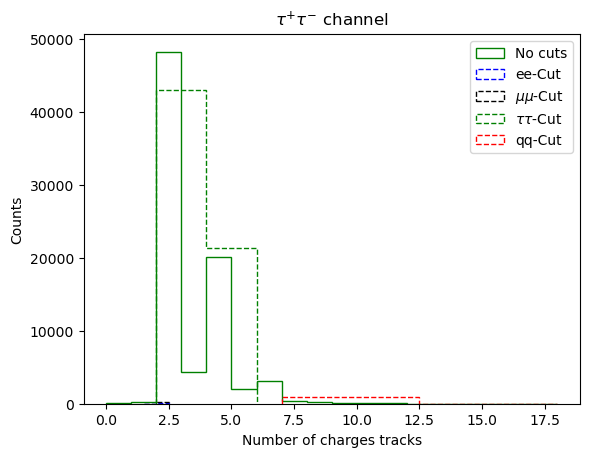

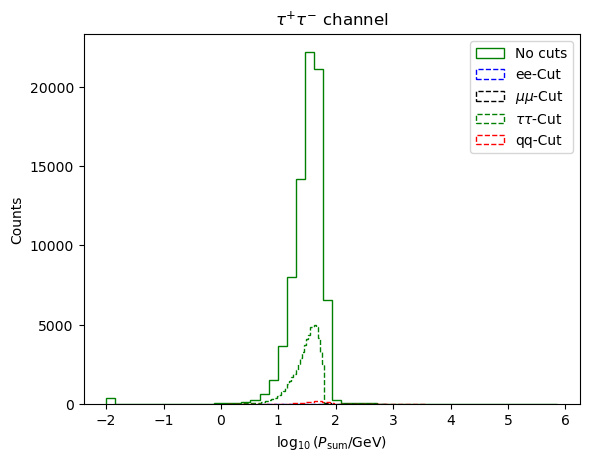

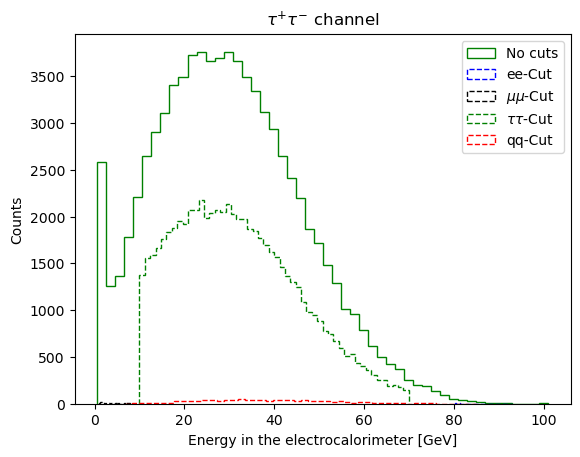

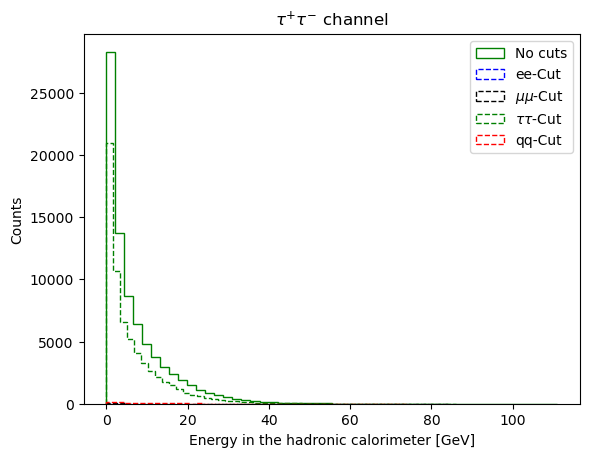

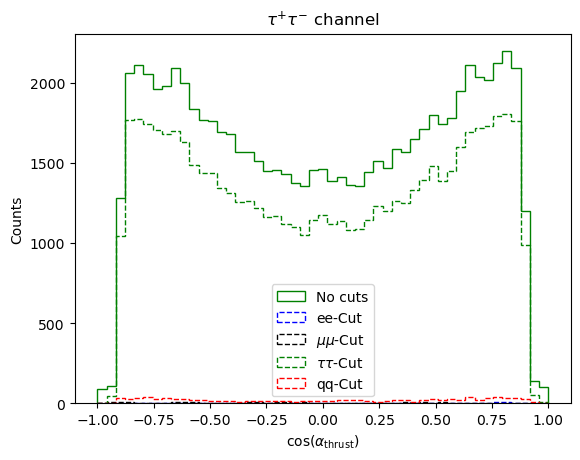

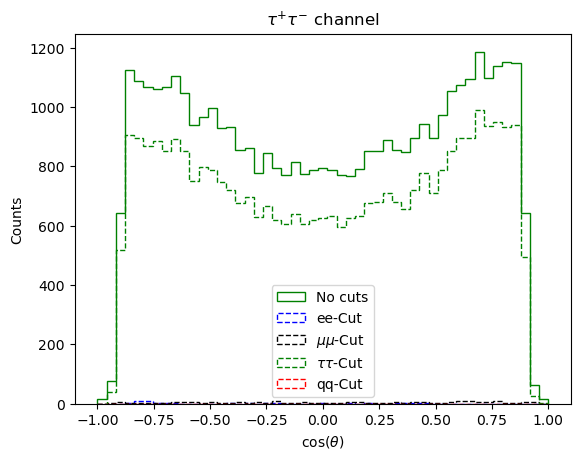

In [72]:
mask_safe1 = (cos_thet3>-0.9) & (cos_thet3<0.5) # If looking for ee, this cut must be kept due to the s-t contamination! For other channels this can (and maybe should) be taken out
mask1 = (mask_safe1) & (Ncharged3 == 2) & (E_ecal3 > 80) & (E_hcal3 < 11) # completely random cuts, just to show the syntax needed!
mask2 = (Ncharged3 == 2) & (np.log10(Pcharged3+0.01) > 1.8) & (E_ecal3 < 9)
mask3 = (Ncharged3 > 1) & (Ncharged3 < 7) & (np.log10(Pcharged3+0.01) > 0) & (np.log10(Pcharged3+0.01) < 1.8) & (E_ecal3 > 10) & (E_ecal3 < 70) 
mask4 = (Ncharged3 > 6) & (np.log10(Pcharged3+0.01) > 0)

print(f"{len(E_ecal3[mask1])/len(E_ecal3)} ({len(E_ecal3[mask1])}/{len(E_ecal3)}) events of channel tt surviving ee cuts")
print(f"{len(E_ecal3[mask1])/100000} ({len(E_ecal3[mask1])}/100000) events of channel tt surviving ee cuts")
print()
print(f"{len(E_ecal3[mask2])/len(E_ecal3)} ({len(E_ecal3[mask2])}/{len(E_ecal3)}) events of channel tt surviving mm cuts")
print(f"{len(E_ecal3[mask2])/100000} ({len(E_ecal3[mask2])}/100000) events of channel tt surviving mm cuts")
print()
print(f"{len(E_ecal3[mask3])/len(E_ecal3)} ({len(E_ecal3[mask3])}/{len(E_ecal3)}) events of channel tt surviving tt cuts")
print(f"{len(E_ecal3[mask3])/100000} ({len(E_ecal3[mask3])}/100000) events of channel tt surviving tt cuts")
print()
print(f"{len(E_ecal3[mask4])/len(E_ecal3)} ({len(E_ecal3[mask4])}/{len(E_ecal3)}) events of channel tt surviving qq cuts")
print(f"{len(E_ecal3[mask4])/100000} ({len(E_ecal3[mask4])}/100000) events of channel tt surviving qq cuts")

N13=len(E_ecal3[mask1])/100000
N23=len(E_ecal3[mask2])/100000
N33=len(E_ecal3[mask3])/100000
N43=len(E_ecal3[mask4])/100000

plt.hist(Ncharged3,bins=18,color='green',label='No cuts',histtype='step')
plt.hist(Ncharged3[mask1],bins=2,color='blue',linestyle='--',label=r'ee-Cut',histtype='step')
plt.hist(Ncharged3[mask2],bins=2,color='black',linestyle='--',label=r'$\mu\mu$-Cut',histtype='step')
plt.hist(Ncharged3[mask3],bins=2,color='green',linestyle='--',label=r'$\tau\tau$-Cut',histtype='step')
plt.hist(Ncharged3[mask4],bins=2,color='red',linestyle='--',label=r'qq-Cut',histtype='step')
plt.xlabel("Number of charges tracks")
plt.ylabel("Counts")
plt.title(r"${\tau^{+}\tau^{-}}$ channel")
plt.legend()
plt.show()
'''
plt.hist(Pcharged1,bins=50,color='blue',label='No cuts',histtype='step')
plt.hist(Pcharged1[mask1],bins=50,color='blue',linestyle='--',label=r'ee-Cut',histtype='step')
plt.hist(Pcharged1[mask2],bins=50,color='black',linestyle='--',label=r'$\mu\mu$-Cut',histtype='step')
plt.hist(Pcharged1[mask3],bins=50,color='green',linestyle='--',label=r'$\tau\tau$-Cut',histtype='step')
plt.hist(Pcharged1[mask4],bins=50,color='red',linestyle='--',label=r'qq-Cut',histtype='step')
plt.xlabel("Sum of momentum of charged tracks [GeV]")
plt.ylabel("Counts")
plt.title(r"$\rm{e^{+}e^{-}}$ channel")
plt.legend()
plt.show()
'''
plt.hist(np.log10(Pcharged3+0.01),bins=50,color='green',label='No cuts',histtype='step')
plt.hist(np.log10(Pcharged3[mask1]+0.01),bins=50,color='blue',linestyle='--',label=r'ee-Cut',histtype='step')
plt.hist(np.log10(Pcharged3[mask2]+0.01),bins=50,color='black',linestyle='--',label=r'$\mu\mu$-Cut',histtype='step')
plt.hist(np.log10(Pcharged3[mask3]+0.01),bins=50,color='green',linestyle='--',label=r'$\tau\tau$-Cut',histtype='step')
plt.hist(np.log10(Pcharged3[mask4]+0.01),bins=50,color='red',linestyle='--',label=r'qq-Cut',histtype='step')
plt.xlabel(r"$\log_{10} (P_{\rm{sum}} / \rm{GeV})$")
plt.ylabel("Counts")
plt.title(r"${\tau^{+}\tau^{-}}$ channel")
plt.legend()
plt.show()

plt.hist(E_ecal3,bins=50,color='green',label='No cuts',histtype='step')
plt.hist(E_ecal3[mask1],bins=50,color='blue',linestyle='--',label=r'ee-Cut',histtype='step')
plt.hist(E_ecal3[mask2],bins=50,color='black',linestyle='--',label=r'$\mu\mu$-Cut',histtype='step')
plt.hist(E_ecal3[mask3],bins=50,color='green',linestyle='--',label=r'$\tau\tau$-Cut',histtype='step')
plt.hist(E_ecal3[mask4],bins=50,color='red',linestyle='--',label=r'qq-Cut',histtype='step')
plt.xlabel("Energy in the electrocalorimeter [GeV]")
plt.ylabel("Counts")
plt.title(r"${\tau^{+}\tau^{-}}$ channel")
plt.legend()
plt.show()

plt.hist(E_hcal3,bins=50,color='green',label='No cuts',histtype='step')
plt.hist(E_hcal3[mask1],bins=50,color='blue',linestyle='--',label=r'ee-Cut',histtype='step')
plt.hist(E_hcal3[mask2],bins=50,color='black',linestyle='--',label=r'$\mu\mu$-Cut',histtype='step')
plt.hist(E_hcal3[mask3],bins=50,color='green',linestyle='--',label=r'$\tau\tau$-Cut',histtype='step')
plt.hist(E_hcal3[mask4],bins=50,color='red',linestyle='--',label=r'qq-Cut',histtype='step')
plt.xlabel("Energy in the hadronic calorimeter [GeV]")
plt.ylabel("Counts")
plt.title(r"${\tau^{+}\tau^{-}}$ channel")
plt.legend()
plt.show()
'''
plt.hist(cos_thru1,bins=50,color='black',label='No cuts',histtype='step')
plt.hist(cos_thru1[mask1],bins=50,color='red',linestyle='--',label='Cuts',histtype='step')
plt.xlabel(r"$\cos(\alpha_{\rm{thrust}})$")
plt.ylabel("Counts")
plt.title(r"$\rm{e^{+}e^{-}}$ channel")
plt.legend()
plt.show()

plt.hist(cos_thet1,bins=50,color='black',label='No cuts',histtype='step')
plt.hist(cos_thet1[mask1],bins=50,color='red',linestyle='--',label='Cuts',histtype='step')
plt.xlabel(r"$\cos(\theta)$")
plt.ylabel("Counts")
plt.title(r"$\rm{e^{+}e^{-}}$ channel")
plt.legend()
plt.show()
'''
plt.hist(cos_thru3,bins=np.linspace(-1,1,50),color='green',label='No cuts',histtype='step')
plt.hist(cos_thru3[mask1],bins=np.linspace(-1,1,50),color='blue',linestyle='--',label=r'ee-Cut',histtype='step')
plt.hist(cos_thru3[mask2],bins=np.linspace(-1,1,50),color='black',linestyle='--',label=r'$\mu\mu$-Cut',histtype='step')
plt.hist(cos_thru3[mask3],bins=np.linspace(-1,1,50),color='green',linestyle='--',label=r'$\tau\tau$-Cut',histtype='step')
plt.hist(cos_thru3[mask4],bins=np.linspace(-1,1,50),color='red',linestyle='--',label=r'qq-Cut',histtype='step')
plt.xlabel(r"$\cos(\alpha_{\rm{thrust}})$")
plt.ylabel("Counts")
plt.title(r"${\tau^{+}\tau^{-}}$ channel")
plt.legend()
plt.show()

plt.hist(cos_thet3,bins=np.linspace(-1,1,50),color='green',label='No cuts',histtype='step')
plt.hist(cos_thet3[mask1],bins=np.linspace(-1,1,50),color='blue',linestyle='--',label=r'ee-Cut',histtype='step')
plt.hist(cos_thet3[mask2],bins=np.linspace(-1,1,50),color='black',linestyle='--',label=r'$\mu\mu$-Cut',histtype='step')
plt.hist(cos_thet3[mask3],bins=np.linspace(-1,1,50),color='green',linestyle='--',label=r'$\tau\tau$-Cut',histtype='step')
plt.hist(cos_thet3[mask4],bins=np.linspace(-1,1,50),color='red',linestyle='--',label=r'qq-Cut',histtype='step')
plt.xlabel(r"$\cos(\theta)$")
plt.ylabel("Counts")
plt.title(r"${\tau^{+}\tau^{-}}$ channel")
plt.legend()
plt.show()

0.0 (0/98563) events of channel qq surviving ee cuts
0.0 (0/100000) events of channel qq surviving ee cuts

0.0 (0/98563) events of channel qq surviving mm cuts
0.0 (0/100000) events of channel qq surviving mm cuts

0.004636628349380599 (457/98563) events of channel qq surviving tt cuts
0.00457 (457/100000) events of channel qq surviving tt cuts

0.9945922912249019 (98030/98563) events of channel qq surviving qq cuts
0.9803 (98030/100000) events of channel qq surviving qq cuts


<>:34: SyntaxWarning: invalid escape sequence '\m'
<>:78: SyntaxWarning: invalid escape sequence '\c'
<>:34: SyntaxWarning: invalid escape sequence '\m'
<>:78: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_92146/971720690.py:34: SyntaxWarning: invalid escape sequence '\m'
  '''
/tmp/ipykernel_92146/971720690.py:78: SyntaxWarning: invalid escape sequence '\c'
  '''


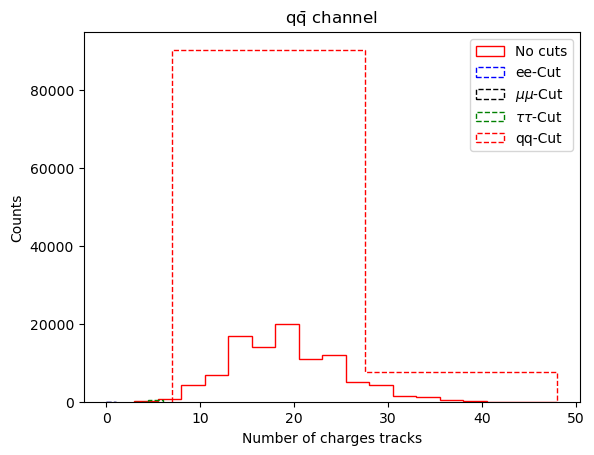

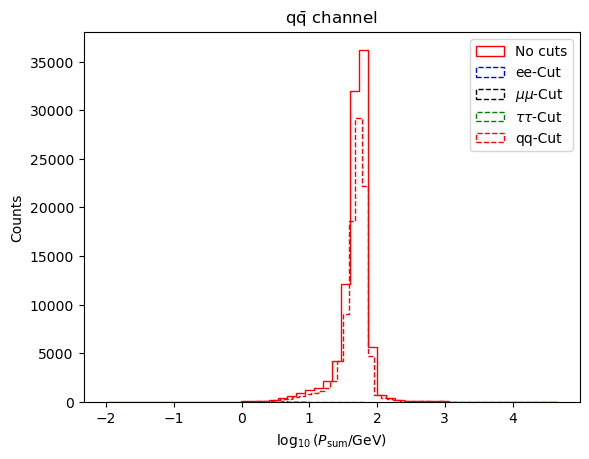

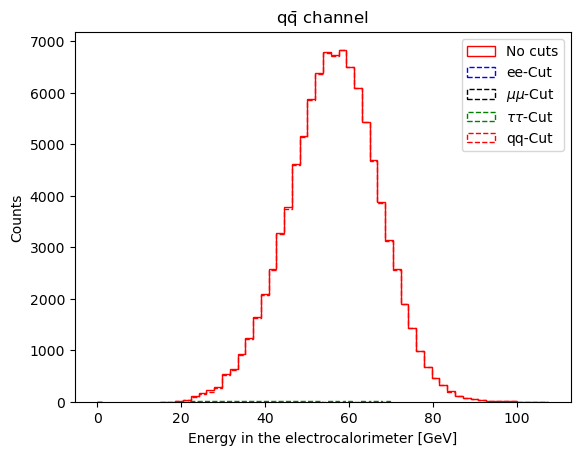

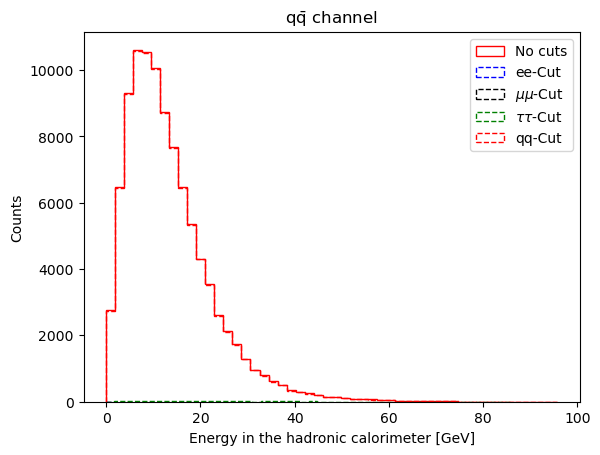

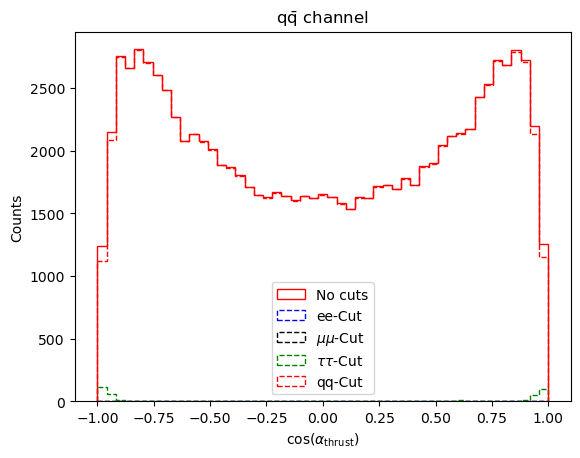

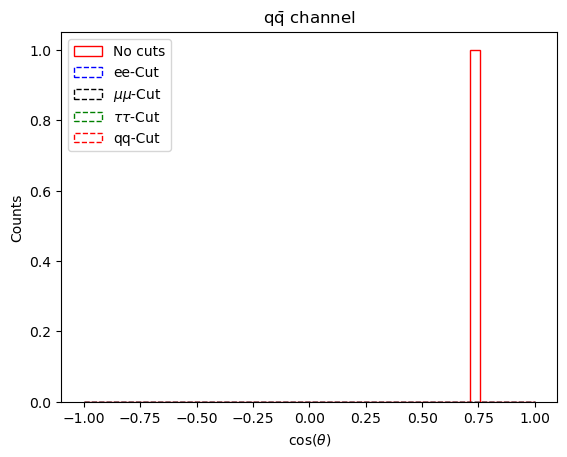

In [73]:
mask_safe1 = (cos_thet4>-0.9) & (cos_thet4<0.5) # If looking for ee, this cut must be kept due to the s-t contamination! For other channels this can (and maybe should) be taken out
mask1 = (mask_safe1) & (Ncharged4 == 2) & (E_ecal4 > 80) & (E_hcal4 < 11) # completely random cuts, just to show the syntax needed!
mask2 = (Ncharged4 == 2) & (np.log10(Pcharged4+0.01) > 1.8) & (E_ecal4 < 9)
mask3 = (Ncharged4 > 1) & (Ncharged4 < 7) & (np.log10(Pcharged4+0.01) > 0) & (np.log10(Pcharged4+0.01) < 1.8) & (E_ecal4 > 10) & (E_ecal4 < 70) 
mask4 = (Ncharged4 > 6) & (np.log10(Pcharged4+0.01) > 0)

print(f"{len(E_ecal4[mask1])/len(E_ecal4)} ({len(E_ecal4[mask1])}/{len(E_ecal4)}) events of channel qq surviving ee cuts")
print(f"{len(E_ecal4[mask1])/100000} ({len(E_ecal4[mask1])}/100000) events of channel qq surviving ee cuts")
print()
print(f"{len(E_ecal4[mask2])/len(E_ecal4)} ({len(E_ecal4[mask2])}/{len(E_ecal4)}) events of channel qq surviving mm cuts")
print(f"{len(E_ecal4[mask2])/100000} ({len(E_ecal4[mask2])}/100000) events of channel qq surviving mm cuts")
print()
print(f"{len(E_ecal4[mask3])/len(E_ecal4)} ({len(E_ecal4[mask3])}/{len(E_ecal4)}) events of channel qq surviving tt cuts")
print(f"{len(E_ecal4[mask3])/100000} ({len(E_ecal4[mask3])}/100000) events of channel qq surviving tt cuts")
print()
print(f"{len(E_ecal4[mask4])/len(E_ecal4)} ({len(E_ecal4[mask4])}/{len(E_ecal4)}) events of channel qq surviving qq cuts")
print(f"{len(E_ecal4[mask4])/100000} ({len(E_ecal4[mask4])}/100000) events of channel qq surviving qq cuts")

N14=len(E_ecal4[mask1])/100000
N24=len(E_ecal4[mask2])/100000
N34=len(E_ecal4[mask3])/100000
N44=len(E_ecal4[mask4])/100000

plt.hist(Ncharged4,bins=18,color='red',label='No cuts',histtype='step')
plt.hist(Ncharged4[mask1],bins=2,color='blue',linestyle='--',label=r'ee-Cut',histtype='step')
plt.hist(Ncharged4[mask2],bins=2,color='black',linestyle='--',label=r'$\mu\mu$-Cut',histtype='step')
plt.hist(Ncharged4[mask3],bins=2,color='green',linestyle='--',label=r'$\tau\tau$-Cut',histtype='step')
plt.hist(Ncharged4[mask4],bins=2,color='red',linestyle='--',label=r'qq-Cut',histtype='step')
plt.xlabel("Number of charges tracks")
plt.ylabel("Counts")
plt.title(r"$\rm{q\bar{q}}$ channel")
plt.legend()
plt.show()
'''
plt.hist(Pcharged1,bins=50,color='blue',label='No cuts',histtype='step')
plt.hist(Pcharged1[mask1],bins=50,color='blue',linestyle='--',label=r'ee-Cut',histtype='step')
plt.hist(Pcharged1[mask2],bins=50,color='black',linestyle='--',label=r'$\mu\mu$-Cut',histtype='step')
plt.hist(Pcharged1[mask3],bins=50,color='green',linestyle='--',label=r'$\tau\tau$-Cut',histtype='step')
plt.hist(Pcharged1[mask4],bins=50,color='red',linestyle='--',label=r'qq-Cut',histtype='step')
plt.xlabel("Sum of momentum of charged tracks [GeV]")
plt.ylabel("Counts")
plt.title(r"$\rm{e^{+}e^{-}}$ channel")
plt.legend()
plt.show()
'''
plt.hist(np.log10(Pcharged4+0.01),bins=50,color='red',label='No cuts',histtype='step')
plt.hist(np.log10(Pcharged4[mask1]+0.01),bins=50,color='blue',linestyle='--',label=r'ee-Cut',histtype='step')
plt.hist(np.log10(Pcharged4[mask2]+0.01),bins=50,color='black',linestyle='--',label=r'$\mu\mu$-Cut',histtype='step')
plt.hist(np.log10(Pcharged4[mask3]+0.01),bins=50,color='green',linestyle='--',label=r'$\tau\tau$-Cut',histtype='step')
plt.hist(np.log10(Pcharged4[mask4]+0.01),bins=50,color='red',linestyle='--',label=r'qq-Cut',histtype='step')
plt.xlabel(r"$\log_{10} (P_{\rm{sum}} / \rm{GeV})$")
plt.ylabel("Counts")
plt.title(r"$\rm{q\bar{q}}$ channel")
plt.legend()
plt.show()

plt.hist(E_ecal4,bins=50,color='red',label='No cuts',histtype='step')
plt.hist(E_ecal4[mask1],bins=50,color='blue',linestyle='--',label=r'ee-Cut',histtype='step')
plt.hist(E_ecal4[mask2],bins=50,color='black',linestyle='--',label=r'$\mu\mu$-Cut',histtype='step')
plt.hist(E_ecal4[mask3],bins=50,color='green',linestyle='--',label=r'$\tau\tau$-Cut',histtype='step')
plt.hist(E_ecal4[mask4],bins=50,color='red',linestyle='--',label=r'qq-Cut',histtype='step')
plt.xlabel("Energy in the electrocalorimeter [GeV]")
plt.ylabel("Counts")
plt.title(r"$\rm{q\bar{q}}$ channel")
plt.legend()
plt.show()

plt.hist(E_hcal4,bins=50,color='red',label='No cuts',histtype='step')
plt.hist(E_hcal4[mask1],bins=50,color='blue',linestyle='--',label=r'ee-Cut',histtype='step')
plt.hist(E_hcal4[mask2],bins=50,color='black',linestyle='--',label=r'$\mu\mu$-Cut',histtype='step')
plt.hist(E_hcal4[mask3],bins=50,color='green',linestyle='--',label=r'$\tau\tau$-Cut',histtype='step')
plt.hist(E_hcal4[mask4],bins=50,color='red',linestyle='--',label=r'qq-Cut',histtype='step')
plt.xlabel("Energy in the hadronic calorimeter [GeV]")
plt.ylabel("Counts")
plt.title(r"$\rm{q\bar{q}}$ channel")
plt.legend()
plt.show()
'''
plt.hist(cos_thru1,bins=50,color='black',label='No cuts',histtype='step')
plt.hist(cos_thru1[mask1],bins=50,color='red',linestyle='--',label='Cuts',histtype='step')
plt.xlabel(r"$\cos(\alpha_{\rm{thrust}})$")
plt.ylabel("Counts")
plt.title(r"$\rm{e^{+}e^{-}}$ channel")
plt.legend()
plt.show()

plt.hist(cos_thet1,bins=50,color='black',label='No cuts',histtype='step')
plt.hist(cos_thet1[mask1],bins=50,color='red',linestyle='--',label='Cuts',histtype='step')
plt.xlabel(r"$\cos(\theta)$")
plt.ylabel("Counts")
plt.title(r"$\rm{e^{+}e^{-}}$ channel")
plt.legend()
plt.show()
'''
plt.hist(cos_thru4,bins=np.linspace(-1,1,50),color='red',label='No cuts',histtype='step')
plt.hist(cos_thru4[mask1],bins=np.linspace(-1,1,50),color='blue',linestyle='--',label=r'ee-Cut',histtype='step')
plt.hist(cos_thru4[mask2],bins=np.linspace(-1,1,50),color='black',linestyle='--',label=r'$\mu\mu$-Cut',histtype='step')
plt.hist(cos_thru4[mask3],bins=np.linspace(-1,1,50),color='green',linestyle='--',label=r'$\tau\tau$-Cut',histtype='step')
plt.hist(cos_thru4[mask4],bins=np.linspace(-1,1,50),color='red',linestyle='--',label=r'qq-Cut',histtype='step')
plt.xlabel(r"$\cos(\alpha_{\rm{thrust}})$")
plt.ylabel("Counts")
plt.title(r"$\rm{q\bar{q}}$ channel")
plt.legend()
plt.show()

plt.hist(cos_thet4,bins=np.linspace(-1,1,50),color='red',label='No cuts',histtype='step')
plt.hist(cos_thet4[mask1],bins=np.linspace(-1,1,50),color='blue',linestyle='--',label=r'ee-Cut',histtype='step')
plt.hist(cos_thet4[mask2],bins=np.linspace(-1,1,50),color='black',linestyle='--',label=r'$\mu\mu$-Cut',histtype='step')
plt.hist(cos_thet4[mask3],bins=np.linspace(-1,1,50),color='green',linestyle='--',label=r'$\tau\tau$-Cut',histtype='step')
plt.hist(cos_thet4[mask4],bins=np.linspace(-1,1,50),color='red',linestyle='--',label=r'qq-Cut',histtype='step')
plt.xlabel(r"$\cos(\theta)$")
plt.ylabel("Counts")
plt.title(r"$\rm{q\bar{q}}$ channel")
plt.legend()
plt.show()

In [74]:
acceptanceMatrix = np.array([[N11,N12,N13,N14],[N21,N22,N23,N24],[N31,N32,N33,N34],[N41,N42,N43,N44]]) # between 0-1
correctedAcceptanceMatrix = np.array([[f_corr*N11,N12,N13,N14],[N21,N22,N23,N24],[N31,N32,N33,N34],[N41,N42,N43,N44]]) # corrected after s-t separation
totalNumberOfEvents = 100000*correctedAcceptanceMatrix # real number of events used in the calculation

print(np.around(acceptanceMatrix, 3))
print()
print(np.around(correctedAcceptanceMatrix, 3))
print()
print(np.around(totalNumberOfEvents, 0))

[[0.199 0.    0.    0.   ]
 [0.    0.811 0.002 0.   ]
 [0.002 0.012 0.643 0.005]
 [0.    0.    0.01  0.98 ]]

[[0.434 0.    0.    0.   ]
 [0.    0.811 0.002 0.   ]
 [0.002 0.012 0.643 0.005]
 [0.    0.    0.01  0.98 ]]

[[4.3446e+04 0.0000e+00 3.9000e+01 0.0000e+00]
 [0.0000e+00 8.1051e+04 2.2200e+02 0.0000e+00]
 [1.9800e+02 1.1880e+03 6.4334e+04 4.5700e+02]
 [1.8000e+01 0.0000e+00 9.7100e+02 9.8030e+04]]


# Part 3 - Getting the physical results

Now that we spent time learning from MC simulations how each channel works and quantitatively estimated the response of our analysis. We can apply it to real data, in which we cannot know what is the real channel that created that event.

With that we can estimate what was the initial total number of events in each channel and, thus, calculate the cross section and decay width.

## Part 3.1 - Calculate the number of real data events after cuts

From data, we have the total number of detected events for each energy bin, $k$, $N^{k}_{\rm{det}}$. We then apply each of our 4 cuts for each channel $j$, getting the number of detected events in each energy bin, $k$ and for each cut, $j$: $N^{j,k}_{\rm{det}}$

In [75]:
# Table with energy bins, don't change this

energy_bins = [44,44.5,45,45.4,45.8,46.2,46.7,47.2]

In [92]:
# Example for reading data and applying cuts

# Choose a dataset from 1, 2, 4, 5 or 6 (3 was faulty and therefore deleted)

dataset = 4

file = uproot.open(f"../Data/Real/daten_{dataset}.root")
tree = file['h33']

Ncharged = np.array(tree['Ncharged'].array())
Pcharged = np.array(tree['Pcharged'].array())
E_ecal = np.array(tree['E_ecal'].array())
E_hcal = np.array(tree['E_hcal'].array())
cos_thru = np.array(tree['cos_thru'].array())
E_lep = np.array(tree['E_lep'].array())
cos_thet = np.array(tree['cos_thet'].array())


mask_safe = (cos_thet>-0.9) & (cos_thet<0.5) # If looking for ee, this cut must be kept due to the s-t contamination! For other channels this can (and maybe should) be taken out
mask1 = (mask_safe) & (Ncharged == 2) & (E_ecal > 80) & (E_hcal < 11) # completely random cuts, just to show the syntax needed!
mask2 = (Ncharged == 2) & (np.log10(Pcharged+0.01) > 1.8) & (E_ecal < 9)
mask3 = (Ncharged > 1) & (Ncharged < 7) & (np.log10(Pcharged+0.01) > 0) & (np.log10(Pcharged+0.01) < 1.8) & (E_ecal > 10) & (E_ecal < 70) 
mask4 = (Ncharged > 6) & (np.log10(Pcharged+0.01) > 0)

for i in range(7): # loop over energy bins
    mask_total = mask4 & (E_lep > energy_bins[i]) & (E_lep < energy_bins[i+1])
    print(f"Number of real data events surviving random cuts in energy bins {i}: {mask_total.sum()}")

Number of real data events surviving random cuts in energy bins 0: 2500
Number of real data events surviving random cuts in energy bins 1: 6651
Number of real data events surviving random cuts in energy bins 2: 8775
Number of real data events surviving random cuts in energy bins 3: 66922
Number of real data events surviving random cuts in energy bins 4: 13007
Number of real data events surviving random cuts in energy bins 5: 6261
Number of real data events surviving random cuts in energy bins 6: 6991


### Exercises

3.1.1. Get the vector $N_{\rm{det}}$ with the number of real data events surviving each set of cuts

In [77]:
N_det = np.array([[90,88,110,2500],
                 [250,255,252,6651],
                 [277,360,357,8775],
                 [1776,2700,2420,66922],
                 [339,529,499,13007],
                 [122,245,253,6261],
                 [145,274,261,6991]])

## Part 3.2 - Estimate the initial number of events in each channel

$N_{\rm{det}}$ doesn't represent the real number of initial events in each channel, because some events are cut out with the cuts and there is some cross contamination. This however is estimate by our acceptance matrix, $A$. We can, therefore, obtain $N_{init}$ by:

$N^{k}_{\rm{det}} = A N^{k}_{\rm{init}} \implies N^{k}_{\rm{init}} = A^{-1} N^{k}_{\rm{det}}$


### Exercises

3.2.1. Get the vector $N_{\rm{init}}$ by applying the inverted corrected acceptance matrix on the vector calculated in the previous step

In [78]:
caM = correctedAcceptanceMatrix 

caM_inv = np.linalg.inv(caM)
print(caM)
print(caM_inv)
#print(caM@caM_inv)

N_init = np.zeros((7,4))

k=0
for i in N_det:
    N_init[k] = caM_inv@i
    k=k+1
print(N_init)


[[4.34457397e-01 0.00000000e+00 3.90000000e-04 0.00000000e+00]
 [0.00000000e+00 8.10510000e-01 2.22000000e-03 0.00000000e+00]
 [1.98000000e-03 1.18800000e-02 6.43340000e-01 4.57000000e-03]
 [1.80000000e-04 0.00000000e+00 9.71000000e-03 9.80300000e-01]]
[[ 2.30172801e+00  2.04544896e-05 -1.39550238e-03  6.50560634e-06]
 [ 1.93973172e-05  1.23385348e+00 -4.25802070e-03  1.98502036e-05]
 [-7.08185567e-03 -2.27861648e-02  1.55458034e+00 -7.24720205e-03]
 [-3.52490283e-04  2.25696194e-04 -1.53980658e-02  1.02016767e+00]]
[[  207.02008002   108.16209536   150.24328304  2548.71353066]
 [  575.12882161   313.6964896    335.97216955  6781.22430587]
 [  637.14491587   442.84669854   481.22629096  8946.4578258 ]
 [ 4084.98243263  3322.46285489  3202.9871528  68234.38100368]
 [  779.68487995   650.84850667   667.01660362 13261.63717791]
 [  280.50349857   301.34347233   341.48749787  6383.3863774 ]
 [  333.43742115   337.10609591   347.81000165  7127.98403157]]


## Part 3.3 - Estimate the cross sections without errors

Now that we estimated the real initial number of events in each channel, we can estimate the energy-dependent cross section for each channel.

The cross-section is given by:

$\sigma_{i}(E_{k}) = \frac{N_{i,j}}{L_{k}} + \eta_{i,k}$,

where $\eta_{i,k}$ are the radiation corrections (here given to you)

In [79]:
def cross (N_c,L,eta):
    return N_c/L + eta

In [80]:
# Radiation correction

radcorr_lep = np.array([0.09,0.2,0.36,0.52,0.22,-0.01,-0.08])
radcorr_had = np.array([2.0,4.3,7.7,10.8,4.7,-0.2,-1.6])

# Luminosity and energy bins for each of the given datasets

LEP_energies = {}
LEP_luminosities = {}
LEP_luminosities_error = {}

LEP_energies[1] = np.array([88.48021,89.47158,90.22720,91.23223,91.97109,92.97091,93.71841])
LEP_luminosities[1] = np.array([675.8590,543.6270,419.7760,3122.204,639.8380,479.2400,766.8380])
LEP_luminosities_error[1] = np.array([3.502185,3.179205,2.810879,7.786547,3.567344,3.121618,3.972102])

LEP_energies[2] = np.array([88.47777,89.46906,90.22324,91.23965,91.96968,92.97059,93.71714])
LEP_luminosities[2] = np.array([371.9800,488.5300,378.5461,2072.793,540.6800,369.4000,353.5000])
LEP_luminosities_error[2] = np.array([2.594937,3.009684,2.670417,6.334670,3.274401,2.737608,2.695570])

LEP_energies[4] = np.array([88.47939,89.46793,90.22266,91.22430,91.96648,92.96465,93.71712])
LEP_luminosities[4] = np.array([463.9790,667.5236,486.7641,2246.568,535.9080,450.6000,709.6980])
LEP_luminosities_error[4] = np.array([2.902361,3.521166,3.033955,6.603405,3.265110,3.027953,3.819882])

LEP_energies[5] = np.array([88.47939,89.46957,90.23120,91.23193,91.97322,92.96836,93.71712])
LEP_luminosities[5] = np.array([463.9790,472.6636,510.2150,3898.628,518.6880,624.5900,709.6980])
LEP_luminosities_error[5] = np.array([2.902361,2.964559,3.099458,8.694719,3.213012,3.564113,3.819882])

LEP_energies[6] = np.array([88.48021,89.46928,90.22604,91.24186,91.96859,92.96836,93.71685])
LEP_luminosities[6] = np.array([675.8590,800.8436,873.7021,7893.498,825.2780,624.5900,942.2280])
LEP_luminosities_error[6] = np.array([3.502185,3.855322,4.057872,12.37099,4.051215,3.564113,4.403135])

In [81]:
# Read the proper values for the dataset you have chosen in 3.1

energies = LEP_energies[dataset]
luminosities = LEP_luminosities[dataset]
luminosities_error = LEP_luminosities_error[dataset]

cross_e = cross(N_init[:,0],luminosities,radcorr_lep)
cross_m = cross(N_init[:,1],luminosities,radcorr_lep)
cross_t = cross(N_init[:,2],luminosities,radcorr_lep)
cross_q = cross(N_init[:,3],luminosities,radcorr_had)

print(cross_e)
print(cross_m)
print(cross_t)
print(cross_q)

[0.53618416 1.06158575 1.66893983 2.33832129 1.67488569 0.61251109
 0.38983001]
[0.32311851 0.66994067 1.26977683 1.99890598 1.43447806 0.65876048
 0.39499936]
[0.41381483 0.7033113  1.34862322 1.94572455 1.4646476  0.74785064
 0.4100817 ]
[ 7.49316571 14.45877837 26.07945285 41.17272008 29.44610787 13.96641451
  8.44368623]


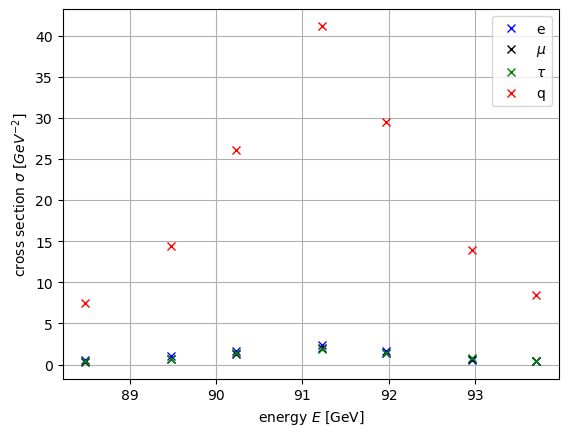

In [82]:
plt.plot(energies,cross_e,label='e',color='blue', marker='x', linestyle='')
plt.plot(energies,cross_m,label=r'$\mu$',color='black', marker='x', linestyle='')
plt.plot(energies,cross_t,label=r'$\tau$',color='green', marker='x', linestyle='')
plt.plot(energies,cross_q,label='q',color='red', marker='x', linestyle='')
plt.xlabel('energy '+r"$E$"+' [GeV]')
plt.ylabel("cross section "+r"$\sigma$"+' ' +r'$[GeV^{-2}]$')
plt.legend()
plt.grid()
plt.show()

### Exercises

3.3.1. Calculate the cross section for each energy and channel for the chosen data set.

3.3.2. Plot the cross section as a function of energy for the four channels.

## Part 3.4 - Fit a Breit-Wigner function to the cross sections

Once the cross sections have been calculated, the physical quantities of the Z0-boson can be retrieved by fitting the expected Breit-Wigner cross section to the data:

$\frac{a}{\frac{4 (x-b)^2}{c^2} + \left(\frac{x}{b}\right)^2}$

### Questions

1. What physical characteristic of the Z0 does each of the free parameters, $a$, $b$ and $c$ correspond to?

### Exercises

3.4.1. Fit a Breit-Wigner function to each of the channels.

3.4.2. Plot the measured data (as in 3.3.2) together with the fitted function. Present the error in the fit function as a shaded area.

(The cells of 2.2. may be useful examples here :D)

In [83]:
def BreitWigner(x,a,b,c):
    return(a/(4./(c**2) * ((x - [b])**2) + (x/[b])**2))

In [84]:
# fit example

popt_e, pcov_e = curve_fit(BreitWigner, energies, cross_e, p0=[2,90,2])
print(f"a_e = {popt_e[0]} +- { np.sqrt(np.diag(pcov_e))[0] }")
print(f"b_e = {popt_e[1]} +- { np.sqrt(np.diag(pcov_e))[1] }")
print(f"c_e = {popt_e[2]} +- { np.sqrt(np.diag(pcov_e))[2] }")
print()
popt_m, pcov_m = curve_fit(BreitWigner, energies, cross_m, p0=[2,90,2])
print(f"a_m = {popt_m[0]} +- { np.sqrt(np.diag(pcov_m))[0] }")
print(f"b_m = {popt_m[1]} +- { np.sqrt(np.diag(pcov_m))[1] }")
print(f"c_m = {popt_m[2]} +- { np.sqrt(np.diag(pcov_m))[2] }")
print()
popt_t, pcov_t = curve_fit(BreitWigner, energies, cross_t, p0=[2,90,2])
print(f"a_t = {popt_t[0]} +- { np.sqrt(np.diag(pcov_t))[0] }")
print(f"b_t = {popt_t[1]} +- { np.sqrt(np.diag(pcov_t))[1] }")
print(f"c_t = {popt_t[2]} +- { np.sqrt(np.diag(pcov_t))[2] }")
print()
popt_q, pcov_q = curve_fit(BreitWigner, energies, cross_q)
print(f"a_q = {popt_q[0]} +- { np.sqrt(np.diag(pcov_q))[0] }")
print(f"b_q = {popt_q[1]} +- { np.sqrt(np.diag(pcov_q))[1] }")
print(f"c_q = {popt_q[2]} +- { np.sqrt(np.diag(pcov_q))[2] }")


a_e = 2.402371857511845 +- 0.10256759146585925
b_e = 91.05291269034704 +- 0.05284950126488902
c_e = 2.5877967762312446 +- 0.16641280127892594

a_m = 2.0066215815099615 +- 0.017113633886107177
b_m = 91.20109418105827 +- 0.011292790338652478
c_m = 2.4743950308845384 +- 0.031692653449550315

a_t = 1.9588620475477365 +- 0.036621773038318095
b_t = 91.19737222330748 +- 0.026355744950859804
c_t = 2.718873634686725 +- 0.07812881970761182

a_q = 41.07443369521549 +- 0.19676026237476124
b_q = 91.1987117638857 +- 0.0064377451830638244
c_q = 2.5369570462905977 +- 0.018353944278329874


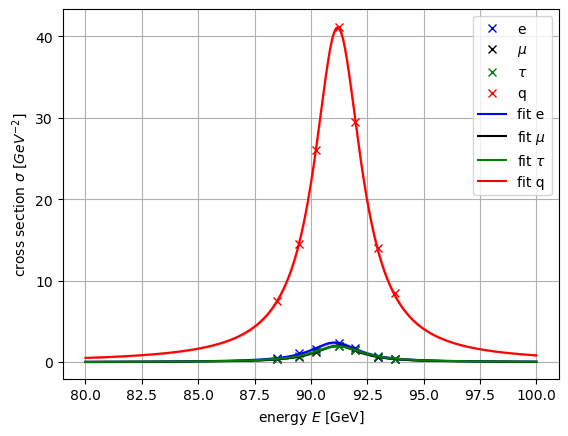

In [85]:
plt.plot(energies,cross_e,label='e',color='blue', marker='x', linestyle='')
plt.plot(energies,cross_m,label=r'$\mu$',color='black', marker='x', linestyle='')
plt.plot(energies,cross_t,label=r'$\tau$',color='green', marker='x', linestyle='')
plt.plot(energies,cross_q,label='q',color='red', marker='x', linestyle='')

plt.plot(np.linspace(80,100,1000),BreitWigner(np.linspace(80,100,1000),*popt_e), label='fit e', color='blue')
plt.plot(np.linspace(80,100,1000),BreitWigner(np.linspace(80,100,1000),*popt_m), label='fit '+r'$\mu$', color='black')
plt.plot(np.linspace(80,100,1000),BreitWigner(np.linspace(80,100,1000),*popt_t), label='fit '+r'$\tau$', color='green')
plt.plot(np.linspace(80,100,1000),BreitWigner(np.linspace(80,100,1000),*popt_q), label='fit q', color='red')

plt.fill_between(np.linspace(80,100,1000),BreitWigner(np.linspace(80,100,1000),*(popt_e-np.sqrt(np.diag(pcov_e)))),BreitWigner(np.linspace(80,100,1000),*(popt_e+np.sqrt(np.diag(pcov_e)))),alpha=0.4,color='blue')
plt.fill_between(np.linspace(80,100,1000),BreitWigner(np.linspace(80,100,1000),*(popt_m-np.sqrt(np.diag(pcov_m)))),BreitWigner(np.linspace(80,100,1000),*(popt_m+np.sqrt(np.diag(pcov_m)))),alpha=0.4,color='black')
plt.fill_between(np.linspace(80,100,1000),BreitWigner(np.linspace(80,100,1000),*(popt_t-np.sqrt(np.diag(pcov_t)))),BreitWigner(np.linspace(80,100,1000),*(popt_t+np.sqrt(np.diag(pcov_t)))),alpha=0.4,color='green')
plt.fill_between(np.linspace(80,100,1000),BreitWigner(np.linspace(80,100,1000),*(popt_q-np.sqrt(np.diag(pcov_q)))),BreitWigner(np.linspace(80,100,1000),*(popt_q+np.sqrt(np.diag(pcov_q)))),alpha=0.4,color='red')


plt.xlabel('energy '+r"$E$"+' [GeV]')
plt.ylabel("cross section "+r"$\sigma$"+' ' +r'$[GeV^{-2}]$')
plt.legend()
plt.grid()
plt.show()





## Part 3.5 - Calculate errors in the cross section data

In the previous part, the fit was done disregarding statistical uncertainties in the measured data. This means that different poins are considered equally into the fit, even tough they shouldn't. In this section we present the calculation of the errors in $\Delta \sigma_{i,k}$.

In order to calculate the final $\Delta \sigma_{i,k}$, we first need to evaluate the statistical uncertainties in each of the terms, i.e., $\Delta L_{k}$, $\Delta N^{j,k}_{\rm{det}}$ and $\Delta A_{i,j}^{-1}$.

*Luminosity*

The uncertainties in the luminosity, $\Delta L_{k}$ were given above.

*Number of measured events*

The uncertainties in the measured events is purely Poissonian, therefore: $\Delta N_{\rm{det}}^{j,k} = \sqrt{N_{\rm{det}}^{j,k}}$

*Acceptance matrix*

The uncertainties in the acceptance matrix are $\Delta A_{i,j} = \sqrt{A_{i,j} (1-A_{i,j})/10^5}$

*Inverted acceptance matrix*

The uncertainties in the INVERTED acceptance matrix are $\Delta A^{-1} = A^{-1} \Delta A A^{-1}$

Finally, via error propagation:

$\sigma_{i,k} = \frac{\Sigma_j A_{i,j}^{-1} N_{\rm{det}}^{j,k}}{L_{k}}$

$\implies \Delta \sigma_{i,k} = \sqrt{\Sigma_j \left(\Delta A^{-1}_{i,j} \frac{N_{\rm{det}}^{j,k}}{L_{k}}\right)^2 + \Sigma_j \left( \Delta N_{\rm{det}}^{j,k} \frac{A^{-1}_{i,j}}{L_{k}} \right)^2 + \Sigma_j \left( \Delta L_k \frac{A^{-1}_{i,j} N_{\rm{det}}^{j,k}}{L^2_k}\right)^2 }$

In [86]:
delta_N_det = np.sqrt(N_det)
delta_caM = np.sqrt(caM*(1-caM)/10**5)
delta_caM_inv = caM_inv@delta_caM@caM_inv

print(N_det)
print(delta_N_det)
print(delta_caM)
print(delta_caM_inv)
print()

delta_sigma = np.zeros((4,7))
for i in range(4):
    for k in range(7):
        delta_sigma[i,k] = np.sqrt(np.sum((delta_caM_inv[i,:]*N_det[k,:]/luminosities[k])**2 + (delta_N_det[k,:]*caM_inv[i,:]/luminosities[k])**2 + (luminosities_error[k]*caM_inv[i,:]*N_det[k,:]/luminosities[k]**2)**2))

print(delta_sigma)



[[   90    88   110  2500]
 [  250   255   252  6651]
 [  277   360   357  8775]
 [ 1776  2700  2420 66922]
 [  339   529   499 13007]
 [  122   245   253  6261]
 [  145   274   261  6991]]
[[  9.48683298   9.38083152  10.48808848  50.        ]
 [ 15.8113883   15.96871942  15.87450787  81.55366331]
 [ 16.64331698  18.97366596  18.89444363  93.67496998]
 [ 42.14261501  51.96152423  49.1934955  258.69286809]
 [ 18.41195264  23.          22.3383079  114.04823541]
 [ 11.04536102  15.65247584  15.90597372  79.12648103]
 [ 12.04159458  16.55294536  16.15549442  83.61220007]]
[[1.56749535e-03 0.00000000e+00 6.24378011e-05 0.00000000e+00]
 [0.00000000e+00 1.23928826e-03 1.48831166e-04 0.00000000e+00]
 [1.40573098e-04 3.42620280e-04 1.51477274e-03 2.13286547e-04]
 [4.24225883e-05 0.00000000e+00 3.10092178e-04 4.39453183e-04]]
[[ 8.30306126e-03 -3.71159233e-06  2.15109789e-04 -1.30351393e-06]
 [-2.53071489e-06  1.88084771e-03  2.68971112e-04 -2.17143046e-06]
 [ 4.60003495e-04  5.68905209e-04  3.

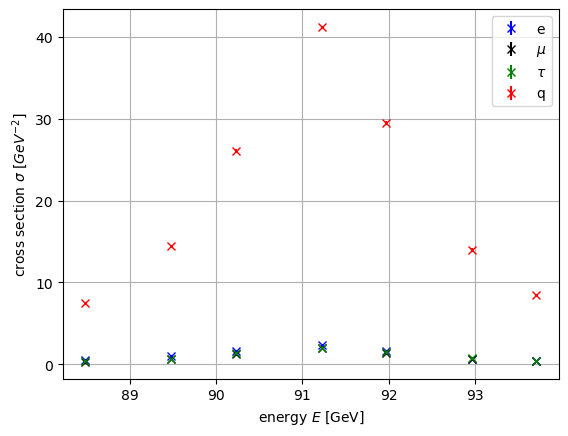

In [87]:
plt.errorbar(energies,cross_e,delta_sigma[0],label='e',color='blue', marker='x', linestyle='')
plt.errorbar(energies,cross_m,delta_sigma[1],label=r'$\mu$',color='black', marker='x', linestyle='')
plt.errorbar(energies,cross_t,delta_sigma[2],label=r'$\tau$',color='green', marker='x', linestyle='')
plt.errorbar(energies,cross_q,delta_sigma[3],label='q',color='red', marker='x', linestyle='')
plt.xlabel('energy '+r"$E$"+' [GeV]')
plt.ylabel("cross section "+r"$\sigma$"+' ' +r'$[GeV^{-2}]$')
plt.legend()
plt.grid()
plt.show()

### Exercises

3.5.1. Calculate the statistical uncertainties on the cross sections for each energy and channel.

3.5.2. Plot the cross section showing the statistical uncertainties.

## Part 3.6 - Fit of the data considering errors

Finally, we can now fit the data considering the errors in the data, as it should be.

### Exercises

3.6.1. Refit the data, now considering the statistical uncertainties.

3.6.2. Plot the data with errors and the fitted functions.

3.6.3. Calculate the $\chi^2/\rm{NDF}$ for each channel.

### Questions

1. What does the $\chi^2/\rm{NDF}$ mean?

2. What range of $\chi^2/\rm{NDF}$ denotes a good fit? What happens outside of this range?

3. How good was the fit you just got?

In [88]:
# Example to run the fit with errors


popt_ec, pcov_ec = curve_fit(BreitWigner, energies, cross_e, sigma=delta_sigma[0], p0=[2,90,2], absolute_sigma=True)
print(f"a_e = {popt_ec[0]} +- { np.sqrt(np.diag(pcov_ec))[0] }")
print(f"b_e = {popt_ec[1]} +- { np.sqrt(np.diag(pcov_ec))[1] }")
print(f"c_e = {popt_ec[2]} +- { np.sqrt(np.diag(pcov_ec))[2] }")
print()
popt_mc, pcov_mc = curve_fit(BreitWigner, energies, cross_m, sigma=delta_sigma[1], p0=[2,90,2], absolute_sigma=True)
print(f"a_m = {popt_mc[0]} +- { np.sqrt(np.diag(pcov_mc))[0] }")
print(f"b_m = {popt_mc[1]} +- { np.sqrt(np.diag(pcov_mc))[1] }")
print(f"c_m = {popt_mc[2]} +- { np.sqrt(np.diag(pcov_mc))[2] }")
print()
popt_tc, pcov_tc = curve_fit(BreitWigner, energies, cross_t, sigma=delta_sigma[2], p0=[2,90,2], absolute_sigma=True)
print(f"a_t = {popt_tc[0]} +- { np.sqrt(np.diag(pcov_tc))[0] }")
print(f"b_t = {popt_tc[1]} +- { np.sqrt(np.diag(pcov_tc))[1] }")
print(f"c_t = {popt_tc[2]} +- { np.sqrt(np.diag(pcov_tc))[2] }")
print()
popt_qc, pcov_qc = curve_fit(BreitWigner, energies, cross_q, sigma=delta_sigma[3], absolute_sigma=True)
print(f"a_q = {popt_qc[0]} +- { np.sqrt(np.diag(pcov_qc))[0] }")
print(f"b_q = {popt_qc[1]} +- { np.sqrt(np.diag(pcov_qc))[1] }")
print(f"c_q = {popt_qc[2]} +- { np.sqrt(np.diag(pcov_qc))[2] }")


a_e = 2.4186127563143005 +- 0.049955400026124475
b_e = 91.01002979483476 +- 0.03393868480286842
c_e = 2.547715944072377 +- 0.08094090827039833

a_m = 2.0034475217644148 +- 0.02825137462662124
b_m = 91.20912934900906 +- 0.027821312799085375
c_m = 2.462328462134836 +- 0.05585034132433607

a_t = 1.9527858590477853 +- 0.0347118489835681
b_t = 91.20415414076264 +- 0.036094793183284395
c_t = 2.6931931684129746 +- 0.07745137692445055

a_q = 41.126752608051035 +- 0.14328119241668755
b_q = 91.20345649565712 +- 0.006435960973227945
c_q = 2.5422518708846003 +- 0.013290937047513076


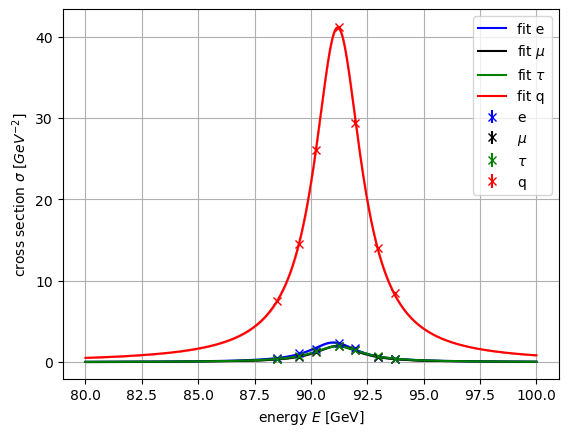

In [89]:
plt.errorbar(energies,cross_e,delta_sigma[0],label='e',color='blue', marker='x', linestyle='')
plt.errorbar(energies,cross_m,delta_sigma[1],label=r'$\mu$',color='black', marker='x', linestyle='')
plt.errorbar(energies,cross_t,delta_sigma[2],label=r'$\tau$',color='green', marker='x', linestyle='')
plt.errorbar(energies,cross_q,delta_sigma[3],label='q',color='red', marker='x', linestyle='')

plt.plot(np.linspace(80,100,1000),BreitWigner(np.linspace(80,100,1000),*popt_ec), label='fit e', color='blue')
plt.plot(np.linspace(80,100,1000),BreitWigner(np.linspace(80,100,1000),*popt_mc), label='fit '+r'$\mu$', color='black')
plt.plot(np.linspace(80,100,1000),BreitWigner(np.linspace(80,100,1000),*popt_tc), label='fit '+r'$\tau$', color='green')
plt.plot(np.linspace(80,100,1000),BreitWigner(np.linspace(80,100,1000),*popt_qc), label='fit q', color='red')

plt.fill_between(np.linspace(80,100,1000),BreitWigner(np.linspace(80,100,1000),*(popt_ec-np.sqrt(np.diag(pcov_ec)))),BreitWigner(np.linspace(80,100,1000),*(popt_ec+np.sqrt(np.diag(pcov_ec)))),alpha=0.4,color='blue')
plt.fill_between(np.linspace(80,100,1000),BreitWigner(np.linspace(80,100,1000),*(popt_mc-np.sqrt(np.diag(pcov_mc)))),BreitWigner(np.linspace(80,100,1000),*(popt_mc+np.sqrt(np.diag(pcov_mc)))),alpha=0.4,color='black')
plt.fill_between(np.linspace(80,100,1000),BreitWigner(np.linspace(80,100,1000),*(popt_tc-np.sqrt(np.diag(pcov_tc)))),BreitWigner(np.linspace(80,100,1000),*(popt_tc+np.sqrt(np.diag(pcov_tc)))),alpha=0.4,color='green')
plt.fill_between(np.linspace(80,100,1000),BreitWigner(np.linspace(80,100,1000),*(popt_qc-np.sqrt(np.diag(pcov_qc)))),BreitWigner(np.linspace(80,100,1000),*(popt_qc+np.sqrt(np.diag(pcov_qc)))),alpha=0.4,color='red')


plt.xlabel('energy '+r"$E$"+' [GeV]')
plt.ylabel("cross section "+r"$\sigma$"+' ' +r'$[GeV^{-2}]$')
plt.legend()
plt.grid()
plt.show()

In [90]:
# calculate chi squared
Ndof = 4

chis_e = np.sum((cross_e-BreitWigner(energies,*popt_ec))**2/(delta_sigma[0]**2))
chis_m = np.sum((cross_m-BreitWigner(energies,*popt_mc))**2/(delta_sigma[1]**2))
chis_t = np.sum((cross_t-BreitWigner(energies,*popt_tc))**2/(delta_sigma[2]**2))
chis_q = np.sum((cross_q-BreitWigner(energies,*popt_qc))**2/(delta_sigma[3]**2))

ac_e = chis_e/Ndof
ac_m = chis_m/Ndof
ac_t = chis_t/Ndof
ac_q = chis_q/Ndof

print(ac_e)
print(ac_m)
print(ac_t)
print(ac_q)

2.948222472568614
0.31489129084562933
0.8387255177388636
1.2932546609828754
